In [51]:
from utils import parse_arguments, read_settings, plot_rewards
import matplotlib.pyplot as plt
import gymnasium as gym
import torch
from tqdm import tqdm
from agent import DQNAgent, DoubleDQNAgent
import os
import collections
import numpy as np
from sklearn.model_selection import ParameterGrid
from logger import Logger
os.environ["WANDB_SILENT"] = "false"

In [54]:
def train_dqn(env: gym.Env, agent: DQNAgent, episodes: int, logger: Logger):
    episode_rewards = []
    recent_rewards = collections.deque(maxlen=100)
    for episode in tqdm(range(episodes), desc="Training: "):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = agent.act(state)
            next_state, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            agent.remember(state, action, next_state, reward, done)
            state = next_state
            total_reward += reward
            agent.replay()

        episode_rewards.append(total_reward)
        recent_rewards.append(total_reward)
        # logger.log({'total_reward': total_reward})
        if (episode + 1) % 100 == 0:
            average_rewards = sum(recent_rewards) / len(recent_rewards)
            # logger.log({'average_reward_100_epochs': average_rewards})
            print(
                f"\rEpisode {episode + 1}/{episodes}\tAverage Score: {average_rewards}")
    # logger.logger.finish()
    return episode_rewards

In [3]:
def moving_average(a, n=100):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
train_settings = {'episodes': 2000}
print(f'{train_settings = }')

train_settings = {'episodes': 2000}


In [5]:
# Environment
env = gym.make('MountainCar-v0', render_mode='rgb_array')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
checkpoint_folder = 'checkpoints'
os.makedirs(checkpoint_folder, exist_ok=True)

In [9]:
# Agent
dqn_agent_settings = {'lr': [1e-3, 1e-4],
                      'gamma': [0.95, 0.99, 0.999],
                      'epsilon': [1.0],
                      'epsilon_min': [0.01],
                      'epsilon_decay': [0.99, 0.95],
                      'batch_size': [64],
                      'hidden_units': [64],
                      }
dqn_params = ParameterGrid(dqn_agent_settings)
dqn_checkpoint_path = os.path.join(checkpoint_folder, 'DQNAgent.pth')

max_rewards = -np.inf
for i, param in enumerate(dqn_params):
    print(f'{i+1}/{len(dqn_params)}\n', param)
    dqn_agent = DQNAgent(state_size, action_size, **param)

    dqn_rewards = train_dqn(env, dqn_agent, **train_settings,
                            logger=Logger(param, dqn_agent.__class__.__name__, 'INM707-DRL'))

    if (x := moving_average(dqn_rewards, 100).mean()) > max_rewards:
        max_rewards = x
        best_dqn_config = param
        best_dqn_agent = dqn_agent
        best_dqn_rewards = dqn_rewards
        dqn_agent.save_state(dqn_checkpoint_path)
        print(f'New best DQN agent found: {best_dqn_config}\n{x = }')

1/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:13<04:22,  7.23it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 201/2000 [00:26<03:10,  9.45it/s]

Episode 200/2000	Average Score: -198.15


Training:  15%|█▌        | 301/2000 [00:37<02:51,  9.91it/s]

Episode 300/2000	Average Score: -194.18


Training:  20%|██        | 401/2000 [00:46<02:47,  9.53it/s]

Episode 400/2000	Average Score: -174.04


Training:  25%|██▌       | 501/2000 [00:57<02:30,  9.98it/s]

Episode 500/2000	Average Score: -191.97


Training:  30%|███       | 602/2000 [01:06<01:53, 12.35it/s]

Episode 600/2000	Average Score: -174.2


Training:  35%|███▌      | 703/2000 [01:14<01:33, 13.86it/s]

Episode 700/2000	Average Score: -156.05


Training:  40%|████      | 801/2000 [01:22<01:58, 10.16it/s]

Episode 800/2000	Average Score: -165.37


Training:  45%|████▌     | 901/2000 [01:31<01:45, 10.44it/s]

Episode 900/2000	Average Score: -171.54


Training:  50%|█████     | 1002/2000 [01:40<01:23, 11.96it/s]

Episode 1000/2000	Average Score: -177.9


Training:  55%|█████▌    | 1102/2000 [01:49<01:21, 11.00it/s]

Episode 1100/2000	Average Score: -169.91


Training:  60%|██████    | 1201/2000 [01:58<01:13, 10.85it/s]

Episode 1200/2000	Average Score: -174.64


Training:  65%|██████▌   | 1301/2000 [02:07<01:04, 10.85it/s]

Episode 1300/2000	Average Score: -163.67


Training:  70%|███████   | 1401/2000 [02:16<00:55, 10.75it/s]

Episode 1400/2000	Average Score: -162.04


Training:  75%|███████▌  | 1501/2000 [02:24<00:48, 10.24it/s]

Episode 1500/2000	Average Score: -156.68


Training:  80%|████████  | 1601/2000 [02:33<00:36, 10.98it/s]

Episode 1600/2000	Average Score: -160.62


Training:  85%|████████▌ | 1701/2000 [02:41<00:23, 12.93it/s]

Episode 1700/2000	Average Score: -164.06


Training:  90%|█████████ | 1801/2000 [02:49<00:16, 12.07it/s]

Episode 1800/2000	Average Score: -164.26


Training:  95%|█████████▌| 1901/2000 [02:58<00:08, 11.35it/s]

Episode 1900/2000	Average Score: -166.36


Training: 100%|██████████| 2000/2000 [03:06<00:00, 10.71it/s]


Episode 2000/2000	Average Score: -165.69
New best DQN agent found: {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}
x = -172.09436086270384
2/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:11<03:35,  8.80it/s]

Episode 100/2000	Average Score: -199.5


Training:  10%|█         | 202/2000 [00:22<03:04,  9.76it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 301/2000 [00:33<03:02,  9.33it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [00:43<02:43,  9.79it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [00:53<02:39,  9.40it/s]

Episode 500/2000	Average Score: -199.47


Training:  30%|███       | 601/2000 [01:04<02:19, 10.05it/s]

Episode 600/2000	Average Score: -199.99


Training:  35%|███▌      | 701/2000 [01:15<02:24,  8.99it/s]

Episode 700/2000	Average Score: -198.21


Training:  40%|████      | 801/2000 [01:27<02:25,  8.26it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [01:38<01:53,  9.66it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1002/2000 [01:49<01:34, 10.54it/s]

Episode 1000/2000	Average Score: -199.92


Training:  55%|█████▌    | 1101/2000 [01:59<01:34,  9.52it/s]

Episode 1100/2000	Average Score: -198.96


Training:  60%|██████    | 1200/2000 [02:10<01:22,  9.71it/s]

Episode 1200/2000	Average Score: -199.64


Training:  65%|██████▌   | 1300/2000 [02:21<01:16,  9.20it/s]

Episode 1300/2000	Average Score: -196.42


Training:  70%|███████   | 1401/2000 [02:32<01:16,  7.86it/s]

Episode 1400/2000	Average Score: -199.03


Training:  75%|███████▌  | 1501/2000 [02:44<00:55,  8.99it/s]

Episode 1500/2000	Average Score: -194.65


Training:  80%|████████  | 1600/2000 [02:56<00:42,  9.33it/s]

Episode 1600/2000	Average Score: -189.25


Training:  85%|████████▌ | 1701/2000 [03:08<00:32,  9.33it/s]

Episode 1700/2000	Average Score: -190.49


Training:  90%|█████████ | 1801/2000 [03:18<00:16, 11.95it/s]

Episode 1800/2000	Average Score: -169.94


Training:  95%|█████████▌| 1901/2000 [03:27<00:08, 12.06it/s]

Episode 1900/2000	Average Score: -147.95


Training: 100%|██████████| 2000/2000 [03:37<00:00,  9.21it/s]


Episode 2000/2000	Average Score: -178.21
3/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:11<03:38,  8.69it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 201/2000 [00:23<02:38, 11.33it/s]

Episode 200/2000	Average Score: -189.63


Training:  15%|█▌        | 302/2000 [00:32<01:55, 14.65it/s]

Episode 300/2000	Average Score: -144.22


Training:  20%|██        | 401/2000 [00:41<01:56, 13.72it/s]

Episode 400/2000	Average Score: -136.99


Training:  25%|██▌       | 502/2000 [00:49<01:48, 13.79it/s]

Episode 500/2000	Average Score: -130.94


Training:  30%|███       | 601/2000 [00:57<01:40, 13.97it/s]

Episode 600/2000	Average Score: -130.85


Training:  35%|███▌      | 703/2000 [01:05<01:29, 14.52it/s]

Episode 700/2000	Average Score: -131.17


Training:  40%|████      | 801/2000 [01:12<01:43, 11.53it/s]

Episode 800/2000	Average Score: -137.98


Training:  45%|████▌     | 901/2000 [01:19<01:32, 11.92it/s]

Episode 900/2000	Average Score: -143.18


Training:  50%|█████     | 1002/2000 [01:26<00:52, 19.11it/s]

Episode 1000/2000	Average Score: -124.67


Training:  55%|█████▌    | 1102/2000 [01:33<00:55, 16.22it/s]

Episode 1100/2000	Average Score: -131.14


Training:  60%|██████    | 1203/2000 [01:39<00:52, 15.22it/s]

Episode 1200/2000	Average Score: -123.86


Training:  65%|██████▌   | 1301/2000 [01:45<00:55, 12.51it/s]

Episode 1300/2000	Average Score: -117.19


Training:  70%|███████   | 1401/2000 [01:53<00:45, 13.21it/s]

Episode 1400/2000	Average Score: -137.04


Training:  75%|███████▌  | 1503/2000 [02:01<00:27, 18.00it/s]

Episode 1500/2000	Average Score: -135.0


Training:  80%|████████  | 1600/2000 [02:07<00:41,  9.69it/s]

Episode 1600/2000	Average Score: -117.75


Training:  85%|████████▌ | 1702/2000 [02:15<00:19, 15.56it/s]

Episode 1700/2000	Average Score: -123.71


Training:  90%|█████████ | 1801/2000 [02:22<00:11, 17.30it/s]

Episode 1800/2000	Average Score: -134.8


Training:  95%|█████████▌| 1903/2000 [02:28<00:05, 17.53it/s]

Episode 1900/2000	Average Score: -122.6


Training: 100%|██████████| 2000/2000 [02:34<00:00, 12.94it/s]


Episode 2000/2000	Average Score: -125.56
New best DQN agent found: {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}
x = -135.488532351394
4/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:13<03:56,  8.02it/s]

Episode 100/2000	Average Score: -199.7


Training:  10%|█         | 201/2000 [00:23<03:00,  9.97it/s]

Episode 200/2000	Average Score: -199.79


Training:  15%|█▌        | 301/2000 [00:33<02:51,  9.90it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 401/2000 [00:43<02:44,  9.70it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 501/2000 [00:53<02:28, 10.11it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 602/2000 [01:04<02:14, 10.37it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 702/2000 [01:14<02:11,  9.86it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 801/2000 [01:25<02:03,  9.72it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 902/2000 [01:35<02:01,  9.04it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1001/2000 [01:48<01:40,  9.96it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1101/2000 [01:59<01:35,  9.38it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1201/2000 [02:10<01:22,  9.65it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [02:21<01:08, 10.17it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1401/2000 [02:32<01:01,  9.76it/s]

Episode 1400/2000	Average Score: -198.73


Training:  75%|███████▌  | 1501/2000 [02:43<00:58,  8.52it/s]

Episode 1500/2000	Average Score: -199.42


Training:  80%|████████  | 1600/2000 [02:53<00:45,  8.72it/s]

Episode 1600/2000	Average Score: -196.76


Training:  85%|████████▌ | 1702/2000 [03:05<00:30,  9.83it/s]

Episode 1700/2000	Average Score: -199.55


Training:  90%|█████████ | 1800/2000 [03:15<00:22,  8.98it/s]

Episode 1800/2000	Average Score: -199.18


Training:  95%|█████████▌| 1901/2000 [03:27<00:10,  9.89it/s]

Episode 1900/2000	Average Score: -199.52


Training: 100%|██████████| 2000/2000 [03:36<00:00,  9.23it/s]


Episode 2000/2000	Average Score: -188.28
5/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:10<03:21,  9.41it/s]

Episode 100/2000	Average Score: -199.97


Training:  10%|█         | 202/2000 [00:19<02:25, 12.37it/s]

Episode 200/2000	Average Score: -168.4


Training:  15%|█▌        | 301/2000 [00:27<02:06, 13.42it/s]

Episode 300/2000	Average Score: -151.04


Training:  20%|██        | 402/2000 [00:34<01:41, 15.75it/s]

Episode 400/2000	Average Score: -140.48


Training:  25%|██▌       | 500/2000 [00:43<02:26, 10.25it/s]

Episode 500/2000	Average Score: -167.43


Training:  30%|███       | 600/2000 [00:53<02:29,  9.38it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 701/2000 [01:06<03:10,  6.83it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 801/2000 [01:16<02:05,  9.55it/s]

Episode 800/2000	Average Score: -197.11


Training:  45%|████▌     | 901/2000 [01:25<01:43, 10.61it/s]

Episode 900/2000	Average Score: -175.55


Training:  50%|█████     | 1001/2000 [01:36<01:53,  8.83it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1101/2000 [01:47<01:37,  9.19it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1203/2000 [01:57<00:57, 13.87it/s]

Episode 1200/2000	Average Score: -188.11


Training:  65%|██████▌   | 1302/2000 [02:05<00:46, 14.94it/s]

Episode 1300/2000	Average Score: -148.31


Training:  70%|███████   | 1402/2000 [02:12<00:49, 12.10it/s]

Episode 1400/2000	Average Score: -150.08


Training:  75%|███████▌  | 1502/2000 [02:20<00:31, 15.93it/s]

Episode 1500/2000	Average Score: -143.31


Training:  80%|████████  | 1602/2000 [02:26<00:27, 14.50it/s]

Episode 1600/2000	Average Score: -126.63


Training:  85%|████████▌ | 1702/2000 [02:34<00:22, 13.32it/s]

Episode 1700/2000	Average Score: -136.87


Training:  90%|█████████ | 1802/2000 [02:42<00:16, 12.23it/s]

Episode 1800/2000	Average Score: -143.51


Training:  95%|█████████▌| 1902/2000 [02:49<00:07, 12.49it/s]

Episode 1900/2000	Average Score: -132.27


Training: 100%|██████████| 2000/2000 [02:56<00:00, 11.32it/s]


Episode 2000/2000	Average Score: -134.02
6/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:10<03:25,  9.22it/s]

Episode 100/2000	Average Score: -197.08


Training:  10%|█         | 202/2000 [00:22<03:00,  9.94it/s]

Episode 200/2000	Average Score: -198.67


Training:  15%|█▌        | 301/2000 [00:32<02:56,  9.60it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 401/2000 [00:43<02:54,  9.15it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 502/2000 [00:54<02:31,  9.90it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 601/2000 [01:05<02:32,  9.18it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 701/2000 [01:15<02:12,  9.80it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 801/2000 [01:26<01:56, 10.31it/s]

Episode 800/2000	Average Score: -197.05


Training:  45%|████▌     | 901/2000 [01:36<01:57,  9.32it/s]

Episode 900/2000	Average Score: -193.01


Training:  50%|█████     | 1001/2000 [01:46<01:41,  9.83it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1102/2000 [01:57<01:20, 11.14it/s]

Episode 1100/2000	Average Score: -194.06


Training:  60%|██████    | 1201/2000 [02:04<00:57, 14.01it/s]

Episode 1200/2000	Average Score: -143.19


Training:  65%|██████▌   | 1302/2000 [02:10<00:48, 14.40it/s]

Episode 1300/2000	Average Score: -125.88


Training:  70%|███████   | 1401/2000 [02:18<00:47, 12.72it/s]

Episode 1400/2000	Average Score: -123.82


Training:  75%|███████▌  | 1501/2000 [02:27<00:48, 10.20it/s]

Episode 1500/2000	Average Score: -133.36


Training:  80%|████████  | 1602/2000 [02:35<00:27, 14.54it/s]

Episode 1600/2000	Average Score: -132.45


Training:  85%|████████▌ | 1702/2000 [02:42<00:19, 14.90it/s]

Episode 1700/2000	Average Score: -134.99


Training:  90%|█████████ | 1802/2000 [02:50<00:13, 14.29it/s]

Episode 1800/2000	Average Score: -133.73


Training:  95%|█████████▌| 1902/2000 [02:57<00:06, 15.68it/s]

Episode 1900/2000	Average Score: -127.66


Training: 100%|██████████| 2000/2000 [03:03<00:00, 10.90it/s]


Episode 2000/2000	Average Score: -128.79
7/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:11<03:33,  8.89it/s]

Episode 100/2000	Average Score: -199.22


Training:  10%|█         | 201/2000 [00:22<03:00,  9.98it/s]

Episode 200/2000	Average Score: -185.32


Training:  15%|█▌        | 301/2000 [00:31<02:14, 12.63it/s]

Episode 300/2000	Average Score: -166.87


Training:  20%|██        | 401/2000 [00:40<02:28, 10.78it/s]

Episode 400/2000	Average Score: -165.03


Training:  25%|██▌       | 501/2000 [00:50<03:03,  8.17it/s]

Episode 500/2000	Average Score: -166.06


Training:  30%|███       | 602/2000 [01:00<02:11, 10.67it/s]

Episode 600/2000	Average Score: -182.68


Training:  35%|███▌      | 702/2000 [01:10<01:57, 11.03it/s]

Episode 700/2000	Average Score: -184.08


Training:  40%|████      | 802/2000 [01:20<01:44, 11.43it/s]

Episode 800/2000	Average Score: -177.46


Training:  45%|████▌     | 900/2000 [01:31<01:38, 11.14it/s]

Episode 900/2000	Average Score: -177.41


Training:  50%|█████     | 1001/2000 [01:41<01:21, 12.26it/s]

Episode 1000/2000	Average Score: -177.95


Training:  55%|█████▌    | 1101/2000 [01:50<01:15, 11.89it/s]

Episode 1100/2000	Average Score: -175.95


Training:  60%|██████    | 1201/2000 [01:59<01:16, 10.48it/s]

Episode 1200/2000	Average Score: -168.86


Training:  65%|██████▌   | 1302/2000 [02:09<01:02, 11.09it/s]

Episode 1300/2000	Average Score: -179.06


Training:  70%|███████   | 1401/2000 [02:17<00:57, 10.34it/s]

Episode 1400/2000	Average Score: -170.0


Training:  75%|███████▌  | 1500/2000 [02:27<00:49, 10.11it/s]

Episode 1500/2000	Average Score: -181.95


Training:  80%|████████  | 1601/2000 [02:38<00:46,  8.63it/s]

Episode 1600/2000	Average Score: -176.06


Training:  85%|████████▌ | 1702/2000 [02:47<00:24, 12.20it/s]

Episode 1700/2000	Average Score: -168.44


Training:  90%|█████████ | 1802/2000 [02:56<00:19, 10.40it/s]

Episode 1800/2000	Average Score: -173.44


Training:  95%|█████████▌| 1901/2000 [03:05<00:08, 11.39it/s]

Episode 1900/2000	Average Score: -169.48


Training: 100%|██████████| 2000/2000 [03:12<00:00, 10.36it/s]


Episode 2000/2000	Average Score: -160.39
8/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:10<03:15,  9.73it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 201/2000 [00:22<04:38,  6.45it/s]

Episode 200/2000	Average Score: -198.68


Training:  15%|█▌        | 300/2000 [00:32<02:47, 10.16it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 401/2000 [00:43<02:52,  9.28it/s]

Episode 400/2000	Average Score: -199.7


Training:  25%|██▌       | 500/2000 [00:54<02:40,  9.37it/s]

Episode 500/2000	Average Score: -198.05


Training:  30%|███       | 600/2000 [01:04<02:19, 10.02it/s]

Episode 600/2000	Average Score: -199.49


Training:  35%|███▌      | 702/2000 [01:14<02:09, 10.02it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [01:24<01:54, 10.51it/s]

Episode 800/2000	Average Score: -198.72


Training:  45%|████▌     | 901/2000 [01:34<01:51,  9.89it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1002/2000 [01:44<01:37, 10.28it/s]

Episode 1000/2000	Average Score: -199.11


Training:  55%|█████▌    | 1101/2000 [01:54<01:26, 10.43it/s]

Episode 1100/2000	Average Score: -199.46


Training:  60%|██████    | 1201/2000 [02:04<01:19, 10.05it/s]

Episode 1200/2000	Average Score: -196.49


Training:  65%|██████▌   | 1301/2000 [02:14<01:09,  9.99it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1401/2000 [02:23<00:59, 10.01it/s]

Episode 1400/2000	Average Score: -197.68


Training:  75%|███████▌  | 1502/2000 [02:33<00:45, 10.96it/s]

Episode 1500/2000	Average Score: -188.22


Training:  80%|████████  | 1602/2000 [02:41<00:30, 13.13it/s]

Episode 1600/2000	Average Score: -166.68


Training:  85%|████████▌ | 1702/2000 [02:49<00:21, 14.17it/s]

Episode 1700/2000	Average Score: -162.06


Training:  90%|█████████ | 1802/2000 [02:57<00:17, 11.10it/s]

Episode 1800/2000	Average Score: -161.2


Training:  95%|█████████▌| 1901/2000 [03:07<00:10,  9.67it/s]

Episode 1900/2000	Average Score: -192.79


Training: 100%|██████████| 2000/2000 [03:17<00:00, 10.15it/s]


Episode 2000/2000	Average Score: -197.4
9/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:10<03:19,  9.54it/s]

Episode 100/2000	Average Score: -197.17


Training:  10%|█         | 201/2000 [00:18<02:20, 12.78it/s]

Episode 200/2000	Average Score: -150.68


Training:  15%|█▌        | 302/2000 [00:26<02:09, 13.15it/s]

Episode 300/2000	Average Score: -153.99


Training:  20%|██        | 402/2000 [00:33<01:42, 15.60it/s]

Episode 400/2000	Average Score: -135.92


Training:  25%|██▌       | 502/2000 [00:40<01:35, 15.61it/s]

Episode 500/2000	Average Score: -145.97


Training:  30%|███       | 602/2000 [00:47<01:40, 13.93it/s]

Episode 600/2000	Average Score: -142.52


Training:  35%|███▌      | 701/2000 [00:55<01:40, 12.97it/s]

Episode 700/2000	Average Score: -148.17


Training:  40%|████      | 802/2000 [01:02<01:17, 15.55it/s]

Episode 800/2000	Average Score: -143.19


Training:  45%|████▌     | 900/2000 [01:09<01:05, 16.87it/s]

Episode 900/2000	Average Score: -138.5


Training:  50%|█████     | 1002/2000 [01:16<01:16, 13.09it/s]

Episode 1000/2000	Average Score: -135.23


Training:  55%|█████▌    | 1102/2000 [01:23<01:02, 14.42it/s]

Episode 1100/2000	Average Score: -143.14


Training:  60%|██████    | 1202/2000 [01:30<00:46, 16.99it/s]

Episode 1200/2000	Average Score: -131.24


Training:  65%|██████▌   | 1302/2000 [01:36<00:47, 14.55it/s]

Episode 1300/2000	Average Score: -124.35


Training:  70%|███████   | 1401/2000 [01:42<00:46, 12.84it/s]

Episode 1400/2000	Average Score: -129.29


Training:  75%|███████▌  | 1502/2000 [01:49<00:29, 16.97it/s]

Episode 1500/2000	Average Score: -136.06


Training:  80%|████████  | 1602/2000 [01:57<00:29, 13.61it/s]

Episode 1600/2000	Average Score: -149.85


Training:  85%|████████▌ | 1701/2000 [02:04<00:20, 14.64it/s]

Episode 1700/2000	Average Score: -131.28


Training:  90%|█████████ | 1802/2000 [02:11<00:12, 15.27it/s]

Episode 1800/2000	Average Score: -117.23


Training:  95%|█████████▌| 1902/2000 [02:18<00:07, 12.88it/s]

Episode 1900/2000	Average Score: -130.67


Training: 100%|██████████| 2000/2000 [02:26<00:00, 13.61it/s]

Episode 2000/2000	Average Score: -137.31


10/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:12<03:44,  8.44it/s]

Episode 100/2000	Average Score: -199.8


Training:  10%|█         | 202/2000 [00:28<03:08,  9.56it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 301/2000 [00:41<03:50,  7.38it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 401/2000 [00:54<02:56,  9.04it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 502/2000 [01:05<02:35,  9.62it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 601/2000 [01:15<02:24,  9.69it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 701/2000 [01:25<02:09, 10.05it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [01:35<02:04,  9.67it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 901/2000 [01:45<01:59,  9.17it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1001/2000 [01:56<02:07,  7.82it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1101/2000 [02:06<01:33,  9.63it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1201/2000 [02:17<01:24,  9.49it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1301/2000 [02:28<01:12,  9.64it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1401/2000 [02:38<01:02,  9.53it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1501/2000 [02:48<00:48, 10.24it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1601/2000 [02:58<00:37, 10.60it/s]

Episode 1600/2000	Average Score: -196.92


Training:  85%|████████▌ | 1701/2000 [03:07<00:29, 10.01it/s]

Episode 1700/2000	Average Score: -184.5


Training:  90%|█████████ | 1801/2000 [03:16<00:19, 10.40it/s]

Episode 1800/2000	Average Score: -187.62


Training:  95%|█████████▌| 1902/2000 [03:26<00:07, 13.19it/s]

Episode 1900/2000	Average Score: -177.59


Training: 100%|██████████| 2000/2000 [03:33<00:00,  9.36it/s]


Episode 2000/2000	Average Score: -155.66
11/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:09<02:31, 12.57it/s]

Episode 100/2000	Average Score: -171.32


Training:  10%|█         | 203/2000 [00:16<01:56, 15.39it/s]

Episode 200/2000	Average Score: -140.41


Training:  15%|█▌        | 302/2000 [00:23<01:52, 15.08it/s]

Episode 300/2000	Average Score: -138.54


Training:  20%|██        | 402/2000 [00:30<02:03, 12.91it/s]

Episode 400/2000	Average Score: -135.25


Training:  25%|██▌       | 502/2000 [00:37<01:40, 14.90it/s]

Episode 500/2000	Average Score: -135.58


Training:  30%|███       | 603/2000 [00:44<01:37, 14.29it/s]

Episode 600/2000	Average Score: -134.86


Training:  35%|███▌      | 702/2000 [00:54<02:15,  9.61it/s]

Episode 700/2000	Average Score: -195.65


Training:  40%|████      | 802/2000 [01:04<01:53, 10.51it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 902/2000 [01:14<01:53,  9.67it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1001/2000 [01:23<01:19, 12.61it/s]

Episode 1000/2000	Average Score: -193.0


Training:  55%|█████▌    | 1102/2000 [01:32<01:02, 14.48it/s]

Episode 1100/2000	Average Score: -165.56


Training:  60%|██████    | 1201/2000 [01:40<01:22,  9.70it/s]

Episode 1200/2000	Average Score: -160.62


Training:  65%|██████▌   | 1301/2000 [01:51<01:11,  9.80it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1401/2000 [02:01<01:06,  9.05it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1501/2000 [02:11<00:48, 10.29it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1602/2000 [02:21<00:40,  9.75it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [02:32<00:31,  9.44it/s]

Episode 1700/2000	Average Score: -199.82


Training:  90%|█████████ | 1802/2000 [02:41<00:16, 12.24it/s]

Episode 1800/2000	Average Score: -173.73


Training:  95%|█████████▌| 1901/2000 [02:50<00:10,  9.53it/s]

Episode 1900/2000	Average Score: -154.89


Training: 100%|██████████| 2000/2000 [03:01<00:00, 11.03it/s]


Episode 2000/2000	Average Score: -200.0
12/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 101/2000 [00:10<03:23,  9.32it/s]

Episode 100/2000	Average Score: -197.77


Training:  10%|█         | 201/2000 [00:21<03:01,  9.90it/s]

Episode 200/2000	Average Score: -199.19


Training:  15%|█▌        | 301/2000 [00:31<02:45, 10.25it/s]

Episode 300/2000	Average Score: -199.16


Training:  20%|██        | 400/2000 [00:41<02:46,  9.62it/s]

Episode 400/2000	Average Score: -199.76


Training:  25%|██▌       | 501/2000 [00:52<02:37,  9.51it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 601/2000 [01:02<02:22,  9.79it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 701/2000 [01:12<02:12,  9.83it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 801/2000 [01:22<02:02,  9.82it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 901/2000 [01:33<01:52,  9.74it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1001/2000 [01:43<01:46,  9.35it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1101/2000 [01:53<01:32,  9.71it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [02:03<01:19, 10.07it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [02:14<01:10,  9.91it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1401/2000 [02:24<01:02,  9.52it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1501/2000 [02:35<00:52,  9.54it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1601/2000 [02:45<00:41,  9.68it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1701/2000 [02:55<00:29, 10.02it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1801/2000 [03:06<00:19, 10.25it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1901/2000 [03:16<00:09, 10.09it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [03:26<00:00,  9.68it/s]


Episode 2000/2000	Average Score: -200.0


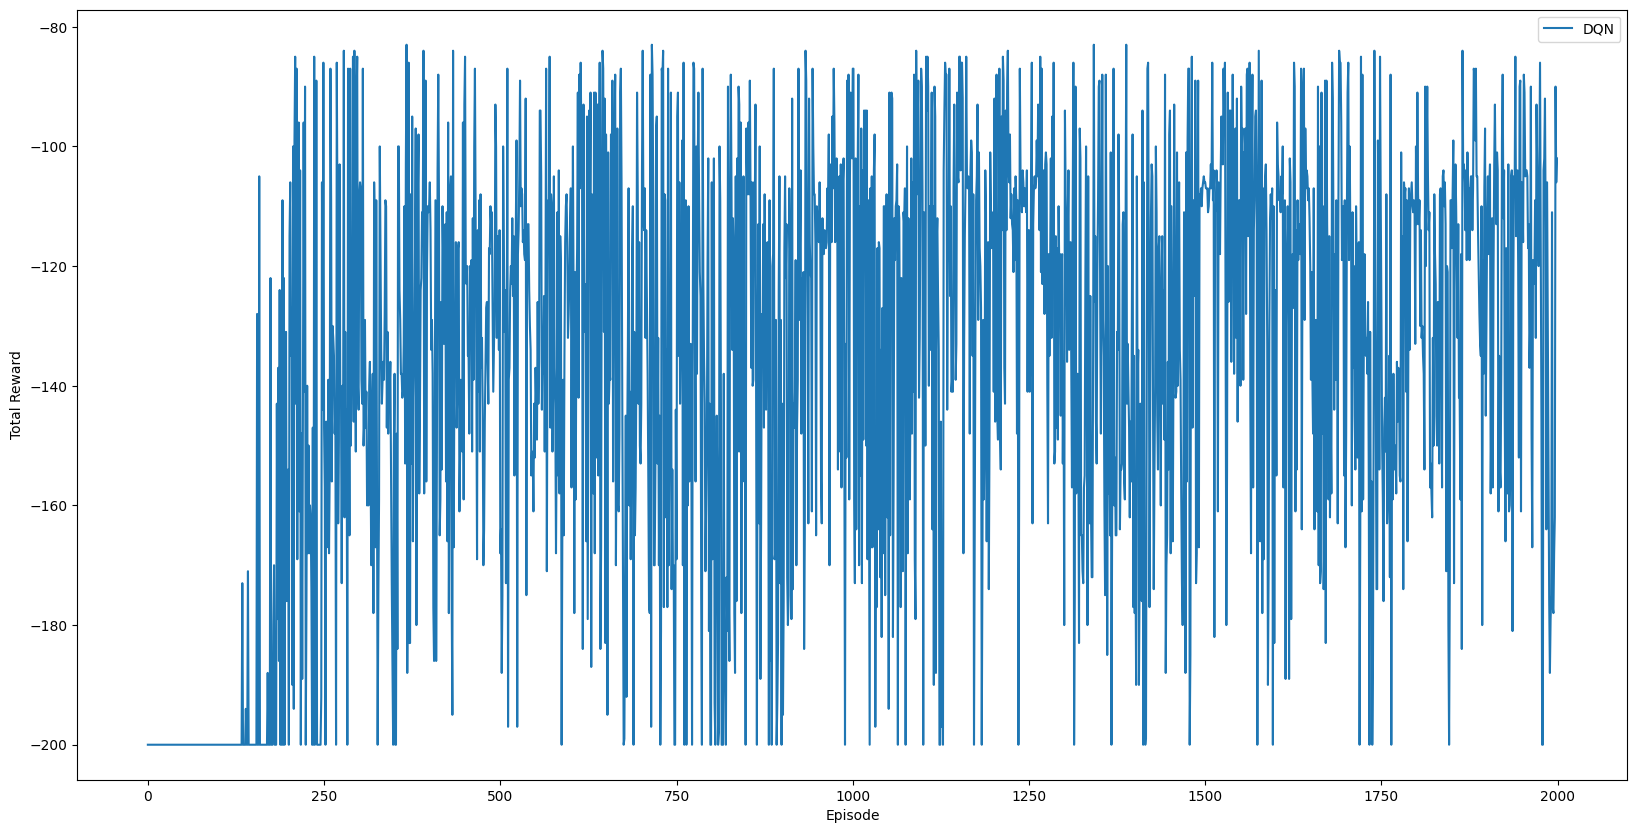

In [11]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(best_dqn_rewards, label='DQN')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

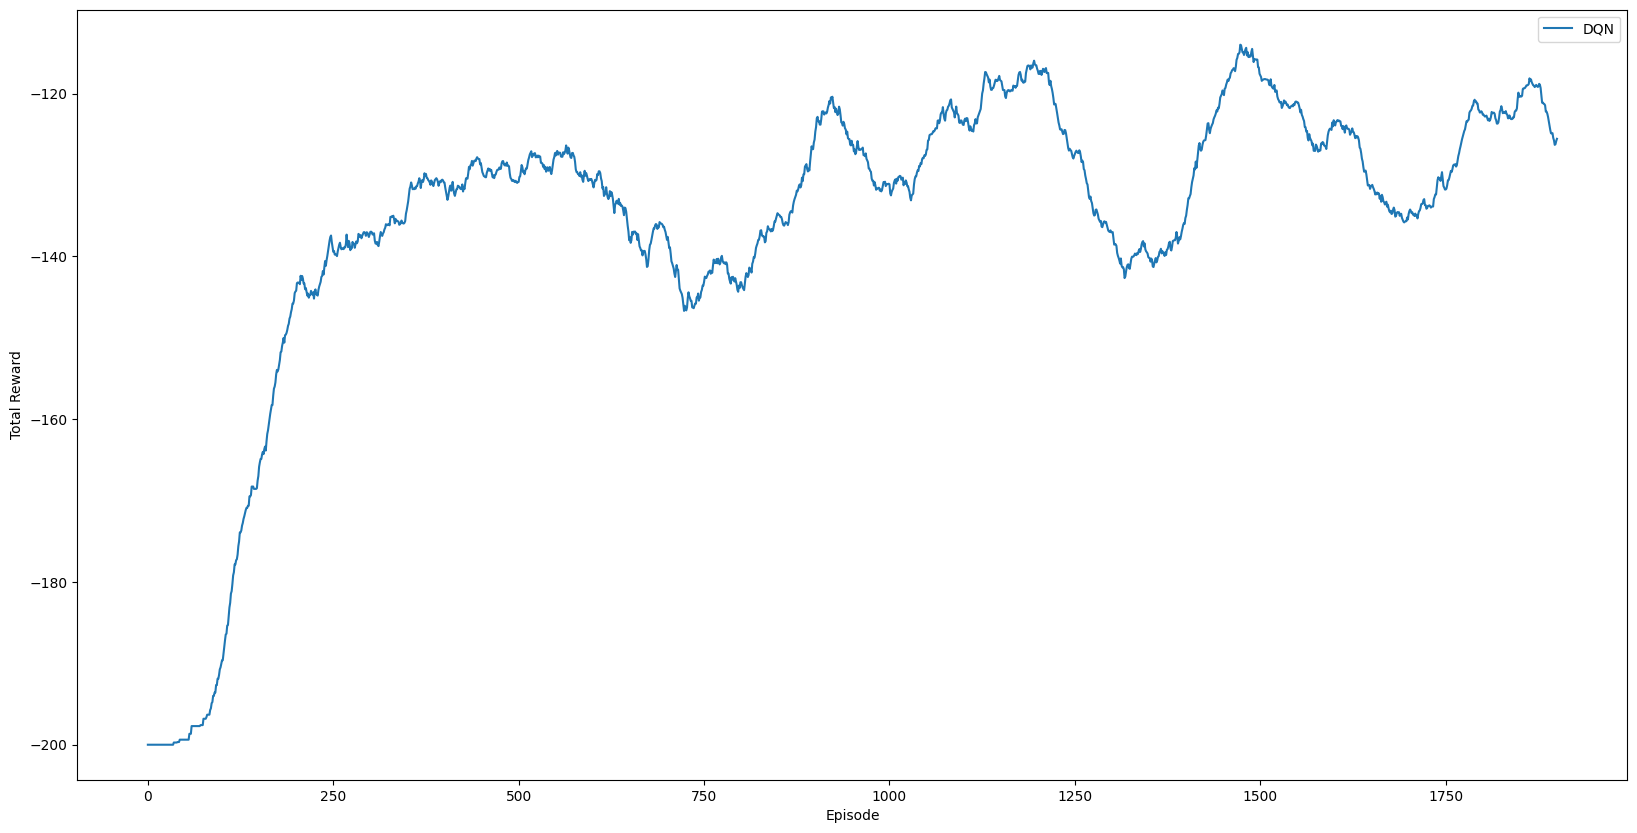

In [12]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(moving_average(best_dqn_rewards), label='DQN')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

In [18]:
dqn_priority_checkpoint_path = os.path.join(
    checkpoint_folder, 'DQN_Priority_Agent.pth')

max_rewards = -np.inf
for i, param in enumerate(dqn_params):
    print(f'{i+1}/{len(dqn_params)}\n', param)
    dqn_priority_agent = DQNAgent(state_size, action_size, **param,
                                  use_prioritized_replay=True)

    dqn_priority_rewards = train_dqn(env, dqn_priority_agent, **train_settings,
                                     logger=Logger(param, dqn_agent.__class__.__name__, 'INM707-DRL'))

    if (x := moving_average(dqn_priority_rewards, 100).mean()) > max_rewards:
        max_rewards = x
        best_dqn_priority_config = param
        best_dqn_priority_agent = dqn_priority_agent
        best_dqn_priority_rewards = dqn_priority_rewards
        dqn_priority_agent.save_state(dqn_priority_checkpoint_path)
        print(f'New best DQN agent found: {best_dqn_priority_config}\n{x = }')

1/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:31<11:46,  2.69it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:09<11:44,  2.56it/s]

Episode 200/2000	Average Score: -197.21


Training:  15%|█▌        | 300/2000 [01:42<09:09,  3.10it/s]

Episode 300/2000	Average Score: -194.31


Training:  20%|██        | 400/2000 [02:10<08:31,  3.13it/s]

Episode 400/2000	Average Score: -166.09


Training:  25%|██▌       | 500/2000 [02:35<05:48,  4.31it/s]

Episode 500/2000	Average Score: -145.53


Training:  30%|███       | 600/2000 [02:59<05:11,  4.50it/s]

Episode 600/2000	Average Score: -145.64


Training:  35%|███▌      | 700/2000 [03:24<04:55,  4.40it/s]

Episode 700/2000	Average Score: -147.49


Training:  40%|████      | 800/2000 [03:50<05:33,  3.60it/s]

Episode 800/2000	Average Score: -150.92


Training:  45%|████▌     | 900/2000 [04:21<06:03,  3.02it/s]

Episode 900/2000	Average Score: -182.4


Training:  50%|█████     | 1000/2000 [04:55<05:31,  3.01it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [05:28<05:06,  2.93it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:01<04:34,  2.91it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [06:35<03:52,  3.01it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [07:08<03:20,  3.00it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [07:42<02:47,  2.98it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [08:16<02:14,  2.97it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [08:49<01:38,  3.04it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [09:23<01:08,  2.92it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [09:57<00:33,  2.95it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [10:30<00:00,  3.17it/s]

Episode 2000/2000	Average Score: -200.0


2/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:28<10:46,  2.94it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:02<10:00,  3.00it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:35<09:21,  3.03it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:09<08:57,  2.98it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:42<08:25,  2.97it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:16<07:53,  2.96it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [03:50<07:12,  3.00it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:24<07:00,  2.85it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [04:58<06:04,  3.02it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [05:32<05:39,  2.95it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:06<05:03,  2.96it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:40<04:41,  2.84it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [07:13<04:03,  2.87it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [07:47<03:21,  2.98it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [08:21<02:46,  3.00it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [08:55<02:13,  3.01it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [09:29<01:43,  2.91it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [10:03<01:07,  2.95it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [10:37<00:33,  2.99it/s]

Episode 1900/2000	Average Score: -198.3


Training: 100%|██████████| 2000/2000 [11:10<00:00,  2.98it/s]

Episode 2000/2000	Average Score: -200.0


3/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 101/2000 [00:26<07:28,  4.24it/s]

Episode 100/2000	Average Score: -186.67


Training:  10%|█         | 200/2000 [00:56<10:08,  2.96it/s]

Episode 200/2000	Average Score: -177.21


Training:  15%|█▌        | 300/2000 [01:28<08:15,  3.43it/s]

Episode 300/2000	Average Score: -186.66


Training:  20%|██        | 400/2000 [01:55<07:04,  3.77it/s]

Episode 400/2000	Average Score: -160.44


Training:  25%|██▌       | 501/2000 [02:19<05:01,  4.98it/s]

Episode 500/2000	Average Score: -143.47


Training:  30%|███       | 600/2000 [02:44<05:15,  4.43it/s]

Episode 600/2000	Average Score: -144.82


Training:  35%|███▌      | 701/2000 [03:13<05:01,  4.31it/s]

Episode 700/2000	Average Score: -174.14


Training:  40%|████      | 800/2000 [03:38<06:40,  3.00it/s]

Episode 800/2000	Average Score: -144.09


Training:  45%|████▌     | 900/2000 [04:04<05:32,  3.31it/s]

Episode 900/2000	Average Score: -157.82


Training:  50%|█████     | 1000/2000 [04:38<05:16,  3.16it/s]

Episode 1000/2000	Average Score: -198.64


Training:  55%|█████▌    | 1100/2000 [05:08<03:26,  4.36it/s]

Episode 1100/2000	Average Score: -175.32


Training:  60%|██████    | 1200/2000 [05:35<04:26,  3.00it/s]

Episode 1200/2000	Average Score: -158.33


Training:  65%|██████▌   | 1300/2000 [06:09<03:59,  2.92it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [06:43<03:30,  2.85it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [07:17<02:47,  2.99it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [07:51<02:21,  2.83it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [08:25<01:39,  3.03it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [08:59<01:07,  2.97it/s]

Episode 1800/2000	Average Score: -199.84


Training:  95%|█████████▌| 1900/2000 [09:29<00:27,  3.70it/s]

Episode 1900/2000	Average Score: -172.48


Training: 100%|██████████| 2000/2000 [10:00<00:00,  3.33it/s]

Episode 2000/2000	Average Score: -185.92


4/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:28<10:48,  2.93it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:02<10:04,  2.98it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:36<09:36,  2.95it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:09<08:53,  3.00it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:43<08:21,  2.99it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:17<08:09,  2.86it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [03:52<07:28,  2.90it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:30<07:32,  2.65it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [05:06<06:23,  2.87it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [05:41<05:55,  2.81it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:17<05:20,  2.81it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:52<04:41,  2.85it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [07:29<04:16,  2.73it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [08:06<03:29,  2.86it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [08:42<02:58,  2.80it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [09:22<02:40,  2.50it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [10:03<02:01,  2.48it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [10:44<01:19,  2.51it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [11:26<00:41,  2.42it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [12:07<00:00,  2.75it/s]

Episode 2000/2000	Average Score: -200.0


5/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:35<13:34,  2.33it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:15<10:39,  2.81it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:51<09:50,  2.88it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:27<09:13,  2.89it/s]

Episode 400/2000	Average Score: -197.97


Training:  25%|██▌       | 500/2000 [02:59<09:38,  2.59it/s]

Episode 500/2000	Average Score: -158.42


Training:  30%|███       | 600/2000 [03:36<09:59,  2.33it/s]

Episode 600/2000	Average Score: -173.98


Training:  35%|███▌      | 700/2000 [04:18<11:05,  1.95it/s]

Episode 700/2000	Average Score: -198.64


Training:  40%|████      | 800/2000 [05:01<08:38,  2.32it/s]

Episode 800/2000	Average Score: -191.22


Training:  45%|████▌     | 900/2000 [05:36<06:16,  2.92it/s]

Episode 900/2000	Average Score: -183.43


Training:  50%|█████     | 1000/2000 [06:06<04:23,  3.79it/s]

Episode 1000/2000	Average Score: -176.28


Training:  55%|█████▌    | 1100/2000 [06:37<05:03,  2.96it/s]

Episode 1100/2000	Average Score: -181.8


Training:  60%|██████    | 1200/2000 [07:09<04:19,  3.08it/s]

Episode 1200/2000	Average Score: -190.41


Training:  65%|██████▌   | 1300/2000 [07:40<03:31,  3.30it/s]

Episode 1300/2000	Average Score: -178.3


Training:  70%|███████   | 1400/2000 [08:11<03:19,  3.01it/s]

Episode 1400/2000	Average Score: -184.63


Training:  75%|███████▌  | 1500/2000 [08:43<02:29,  3.34it/s]

Episode 1500/2000	Average Score: -187.33


Training:  80%|████████  | 1600/2000 [09:10<01:21,  4.89it/s]

Episode 1600/2000	Average Score: -152.48


Training:  85%|████████▌ | 1701/2000 [09:35<01:05,  4.59it/s]

Episode 1700/2000	Average Score: -148.22


Training:  90%|█████████ | 1800/2000 [10:03<01:05,  3.05it/s]

Episode 1800/2000	Average Score: -131.96


Training:  95%|█████████▌| 1900/2000 [10:33<00:28,  3.55it/s]

Episode 1900/2000	Average Score: -148.2


Training: 100%|██████████| 2000/2000 [11:01<00:00,  3.03it/s]

Episode 2000/2000	Average Score: -139.61


6/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:31<11:11,  2.83it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:07<10:09,  2.95it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:41<09:47,  2.89it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:15<09:14,  2.89it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:49<08:23,  2.98it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:22<07:47,  2.99it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [03:56<07:13,  3.00it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:30<07:02,  2.84it/s]

Episode 800/2000	Average Score: -199.41


Training:  45%|████▌     | 900/2000 [05:04<06:11,  2.96it/s]

Episode 900/2000	Average Score: -198.94


Training:  50%|█████     | 1000/2000 [05:41<05:55,  2.81it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:18<05:31,  2.72it/s]

Episode 1100/2000	Average Score: -199.81


Training:  60%|██████    | 1200/2000 [06:58<05:03,  2.64it/s]

Episode 1200/2000	Average Score: -199.93


Training:  65%|██████▌   | 1300/2000 [07:32<03:54,  2.99it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [08:06<03:22,  2.96it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [08:40<02:46,  3.00it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [09:14<02:21,  2.84it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [09:48<01:44,  2.86it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [10:21<01:06,  3.00it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [10:56<00:35,  2.81it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [11:32<00:00,  2.89it/s]

Episode 2000/2000	Average Score: -200.0


7/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:30<10:33,  3.00it/s]

Episode 100/2000	Average Score: -196.64


Training:  10%|█         | 200/2000 [01:05<10:54,  2.75it/s]

Episode 200/2000	Average Score: -199.34


Training:  15%|█▌        | 300/2000 [01:40<09:54,  2.86it/s]

Episode 300/2000	Average Score: -196.58


Training:  20%|██        | 400/2000 [02:15<09:19,  2.86it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:51<08:41,  2.88it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:24<06:52,  3.40it/s]

Episode 600/2000	Average Score: -180.14


Training:  35%|███▌      | 700/2000 [03:53<06:14,  3.47it/s]

Episode 700/2000	Average Score: -166.23


Training:  40%|████      | 800/2000 [04:23<06:02,  3.31it/s]

Episode 800/2000	Average Score: -167.67


Training:  45%|████▌     | 900/2000 [04:56<06:22,  2.88it/s]

Episode 900/2000	Average Score: -186.44


Training:  50%|█████     | 1000/2000 [05:29<05:34,  2.99it/s]

Episode 1000/2000	Average Score: -172.02


Training:  55%|█████▌    | 1100/2000 [06:04<05:11,  2.89it/s]

Episode 1100/2000	Average Score: -189.44


Training:  60%|██████    | 1200/2000 [06:40<04:46,  2.79it/s]

Episode 1200/2000	Average Score: -199.49


Training:  65%|██████▌   | 1300/2000 [07:16<04:05,  2.85it/s]

Episode 1300/2000	Average Score: -191.25


Training:  70%|███████   | 1400/2000 [07:49<03:40,  2.72it/s]

Episode 1400/2000	Average Score: -181.84


Training:  75%|███████▌  | 1500/2000 [08:22<02:37,  3.18it/s]

Episode 1500/2000	Average Score: -181.65


Training:  80%|████████  | 1600/2000 [08:59<02:31,  2.64it/s]

Episode 1600/2000	Average Score: -195.94


Training:  85%|████████▌ | 1700/2000 [09:34<01:28,  3.39it/s]

Episode 1700/2000	Average Score: -193.22


Training:  90%|█████████ | 1800/2000 [10:09<01:13,  2.74it/s]

Episode 1800/2000	Average Score: -192.83


Training:  95%|█████████▌| 1900/2000 [10:46<00:35,  2.81it/s]

Episode 1900/2000	Average Score: -197.37


Training: 100%|██████████| 2000/2000 [11:24<00:00,  2.92it/s]

Episode 2000/2000	Average Score: -199.74


8/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:31<12:17,  2.58it/s]

Episode 100/2000	Average Score: -199.9


Training:  10%|█         | 200/2000 [01:08<10:38,  2.82it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:45<10:13,  2.77it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:21<10:00,  2.66it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:59<09:00,  2.77it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:35<08:20,  2.80it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [04:11<07:49,  2.77it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:49<07:12,  2.78it/s]

Episode 800/2000	Average Score: -199.57


Training:  45%|████▌     | 900/2000 [05:25<06:43,  2.72it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [06:02<06:04,  2.74it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:40<05:23,  2.78it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [07:18<04:49,  2.76it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [23:45<38:53:18, 200.00s/it]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [24:21<03:27,  2.89it/s]    

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [24:55<02:47,  2.99it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [25:29<02:13,  3.00it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [26:03<01:42,  2.93it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [26:38<01:09,  2.86it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [31:25<00:33,  2.96it/s]  

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [47:17<00:00,  1.42s/it]   

Episode 2000/2000	Average Score: -200.0


9/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:27<10:16,  3.08it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [00:59<09:26,  3.18it/s]

Episode 200/2000	Average Score: -198.15


Training:  15%|█▌        | 300/2000 [01:31<07:06,  3.98it/s]

Episode 300/2000	Average Score: -193.65


Training:  20%|██        | 400/2000 [02:01<07:54,  3.37it/s]

Episode 400/2000	Average Score: -181.63


Training:  25%|██▌       | 500/2000 [02:33<08:01,  3.12it/s]

Episode 500/2000	Average Score: -198.24


Training:  30%|███       | 600/2000 [03:05<07:40,  3.04it/s]

Episode 600/2000	Average Score: -197.87


Training:  35%|███▌      | 700/2000 [03:35<06:03,  3.57it/s]

Episode 700/2000	Average Score: -179.83


Training:  40%|████      | 801/2000 [04:06<05:01,  3.98it/s]

Episode 800/2000	Average Score: -184.75


Training:  45%|████▌     | 901/2000 [04:34<03:36,  5.07it/s]

Episode 900/2000	Average Score: -163.41


Training:  50%|█████     | 1001/2000 [04:57<03:10,  5.24it/s]

Episode 1000/2000	Average Score: -133.63


Training:  55%|█████▌    | 1100/2000 [05:24<04:23,  3.41it/s]

Episode 1100/2000	Average Score: -162.05


Training:  60%|██████    | 1200/2000 [05:58<04:35,  2.90it/s]

Episode 1200/2000	Average Score: -188.99


Training:  65%|██████▌   | 1300/2000 [06:32<03:59,  2.92it/s]

Episode 1300/2000	Average Score: -199.5


Training:  70%|███████   | 1400/2000 [07:06<03:31,  2.84it/s]

Episode 1400/2000	Average Score: -194.15


Training:  75%|███████▌  | 1501/2000 [23:09<01:59,  4.19it/s]    

Episode 1500/2000	Average Score: -178.98


Training:  80%|████████  | 1600/2000 [23:31<01:39,  4.01it/s]

Episode 1600/2000	Average Score: -136.57


Training:  85%|████████▌ | 1700/2000 [24:04<01:37,  3.07it/s]

Episode 1700/2000	Average Score: -196.02


Training:  90%|█████████ | 1800/2000 [24:37<01:06,  2.99it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [25:12<00:32,  3.07it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [25:45<00:00,  1.29it/s]

Episode 2000/2000	Average Score: -200.0


10/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:28<10:36,  2.99it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:02<10:08,  2.96it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:36<10:01,  2.83it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [17:02<09:15,  2.88it/s]     

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [22:37<08:44,  2.86it/s]   

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [23:12<07:53,  2.96it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [23:46<07:06,  3.05it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [24:20<06:50,  2.93it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [24:54<06:01,  3.04it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [25:29<05:57,  2.80it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [41:18<05:08,  2.92it/s]    

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [41:51<04:23,  3.04it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [42:25<03:51,  3.03it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [42:58<03:20,  3.00it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [43:31<02:51,  2.91it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [44:05<02:26,  2.74it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [44:37<01:39,  3.01it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [1:02:34<30:46,  9.23s/it]    

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [1:03:09<00:33,  3.01it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [1:20:07<00:00,  2.40s/it]   

Episode 2000/2000	Average Score: -200.0


11/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:27<10:18,  3.07it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:00<09:56,  3.02it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:33<10:26,  2.71it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:01<06:15,  4.26it/s]

Episode 400/2000	Average Score: -170.36


Training:  25%|██▌       | 501/2000 [02:23<04:40,  5.34it/s]

Episode 500/2000	Average Score: -129.91


Training:  30%|███       | 600/2000 [02:49<07:36,  3.07it/s]

Episode 600/2000	Average Score: -157.65


Training:  35%|███▌      | 700/2000 [03:19<07:00,  3.09it/s]

Episode 700/2000	Average Score: -178.96


Training:  40%|████      | 800/2000 [03:49<05:15,  3.80it/s]

Episode 800/2000	Average Score: -180.22


Training:  45%|████▌     | 900/2000 [04:11<04:55,  3.72it/s]

Episode 900/2000	Average Score: -131.4


Training:  50%|█████     | 1000/2000 [04:36<03:49,  4.36it/s]

Episode 1000/2000	Average Score: -140.3


Training:  55%|█████▌    | 1101/2000 [05:01<03:46,  3.97it/s]

Episode 1100/2000	Average Score: -142.51


Training:  60%|██████    | 1200/2000 [05:32<03:19,  4.02it/s]

Episode 1200/2000	Average Score: -178.24


Training:  65%|██████▌   | 1300/2000 [05:59<03:06,  3.75it/s]

Episode 1300/2000	Average Score: -155.89


Training:  70%|███████   | 1400/2000 [06:25<02:18,  4.35it/s]

Episode 1400/2000	Average Score: -142.32


Training:  75%|███████▌  | 1500/2000 [06:49<01:58,  4.23it/s]

Episode 1500/2000	Average Score: -136.06


Training:  80%|████████  | 1600/2000 [22:40<01:36,  4.16it/s]    

Episode 1600/2000	Average Score: -137.66


Training:  85%|████████▌ | 1700/2000 [23:07<01:12,  4.12it/s]

Episode 1700/2000	Average Score: -153.12


Training:  90%|█████████ | 1801/2000 [23:29<00:40,  4.92it/s]

Episode 1800/2000	Average Score: -128.47


Training:  95%|█████████▌| 1901/2000 [23:53<00:20,  4.88it/s]

Episode 1900/2000	Average Score: -148.77


Training: 100%|██████████| 2000/2000 [24:19<00:00,  1.37it/s]

Episode 2000/2000	Average Score: -158.58


12/12
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:28<10:50,  2.92it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:01<09:54,  3.03it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:34<09:14,  3.06it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:06<08:36,  3.10it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:41<08:39,  2.89it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:16<08:11,  2.85it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [03:53<07:40,  2.82it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:29<07:03,  2.84it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [05:04<06:22,  2.88it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [05:41<05:50,  2.85it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:16<05:19,  2.82it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:53<04:57,  2.69it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [07:38<18:50,  1.61s/it]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [08:45<03:49,  2.61it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [09:25<03:21,  2.49it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [10:48<03:20,  2.00it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [11:33<02:10,  2.30it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [12:18<01:29,  2.23it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [13:37<01:06,  1.49it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [14:39<00:00,  2.27it/s]

Episode 2000/2000	Average Score: -200.0


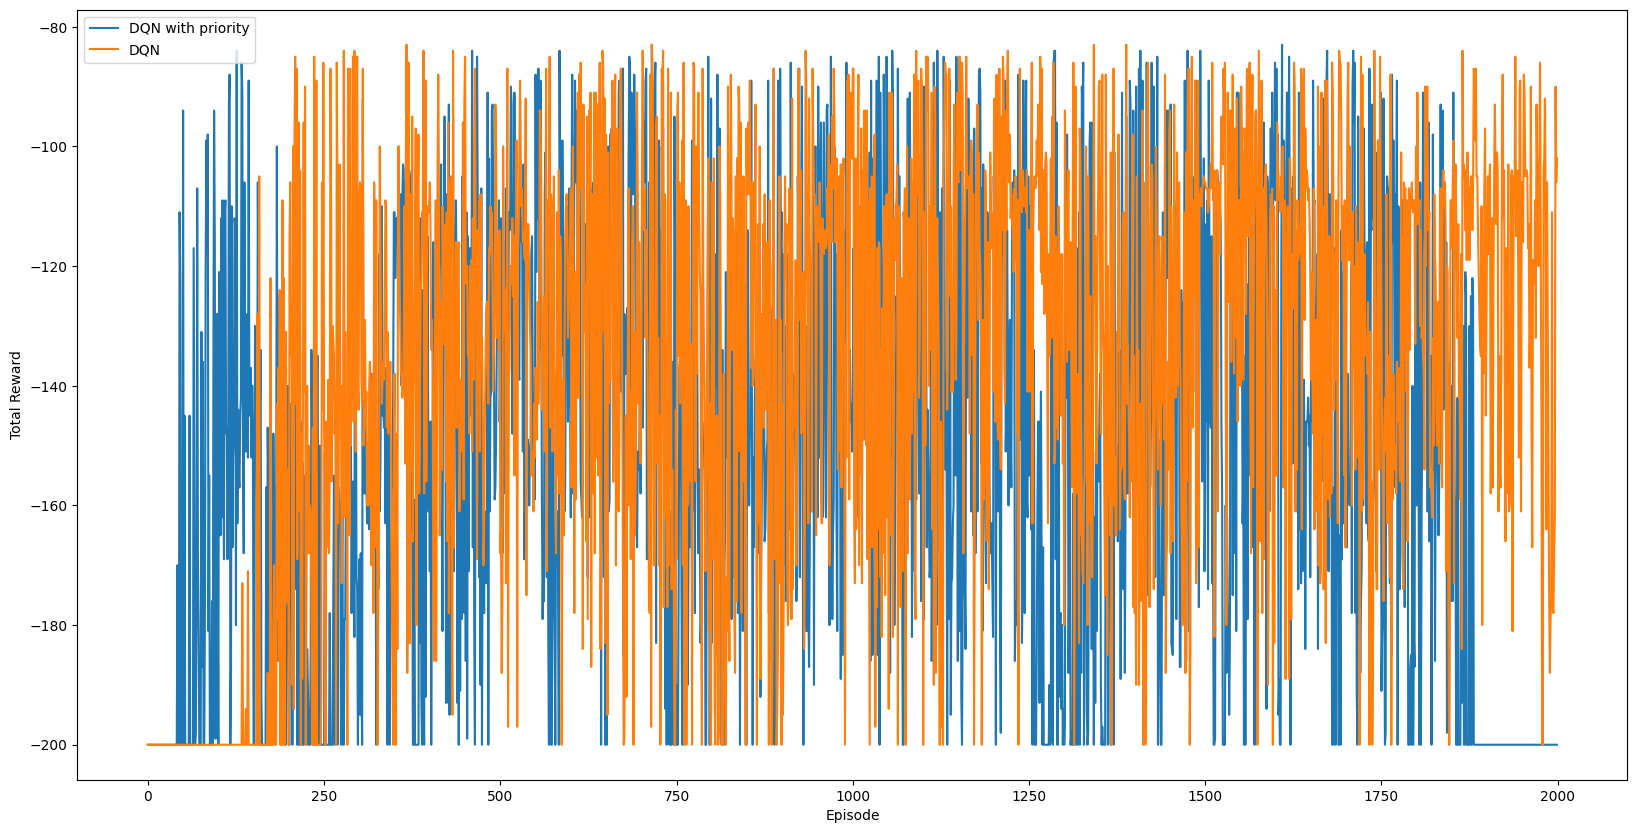

In [47]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(best_dqn_priority_rewards, label='DQN with priority')
ax.plot(best_dqn_rewards, label='DQN')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

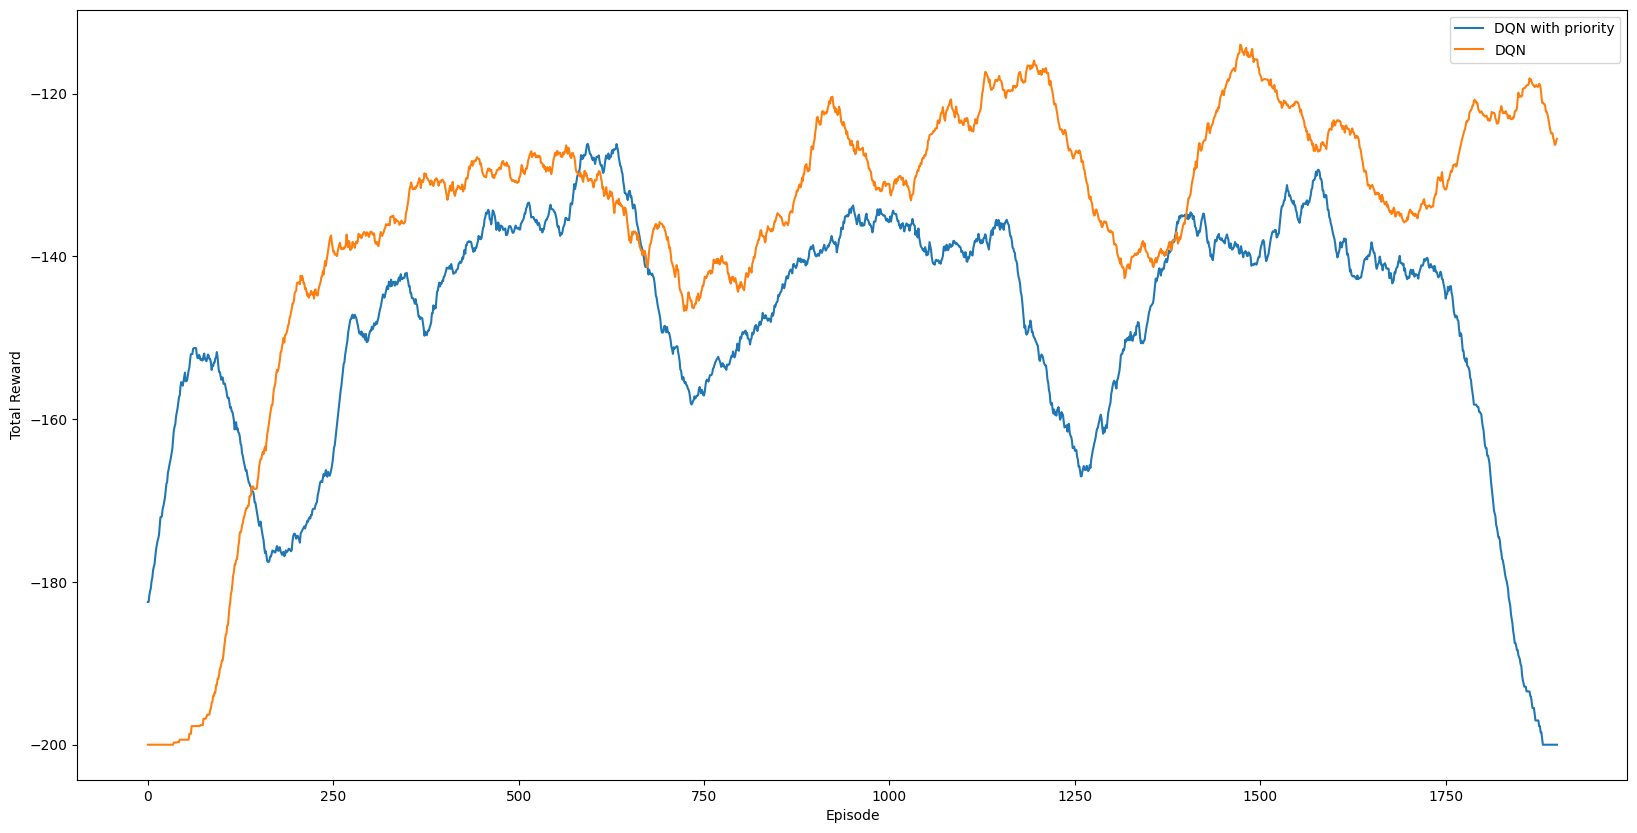

In [46]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(moving_average(best_dqn_priority_rewards), label='DQN with priority')
ax.plot(moving_average(best_dqn_rewards), label='DQN')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

In [ ]:
ddqn_agent_settings = {**dqn_agent_settings,
                       'alpha': [5e-1, 1e-1],
                       'hidden_units': [64],
                       'update_frequency': [4, 10]}
ddqn_params = ParameterGrid(ddqn_agent_settings)
ddqn_checkpoint_path = os.path.join(checkpoint_folder, 'DoubleDQNAgent.pth')

max_rewards = -np.inf
for i, param in enumerate(ddqn_params):
    print(f'{i+1}/{len(ddqn_params)}\n', param)
    ddqn_agent = DoubleDQNAgent(state_size, action_size,
                                **param)

    ddqn_rewards = train_dqn(env, ddqn_agent, **train_settings,
                             logger=Logger(param, ddqn_agent.__class__.__name__, 'INM707-DRL'))

    if (x := moving_average(ddqn_rewards, 100).mean()) > max_rewards:
        max_rewards = x
        best_ddqn_config = param
        best_ddqn_agent = ddqn_agent
        best_ddqn_rewards = ddqn_rewards
        ddqn_agent.save_state(ddqn_checkpoint_path)
        print(f'New best DQN agent found: {best_ddqn_config}\n{x = }')

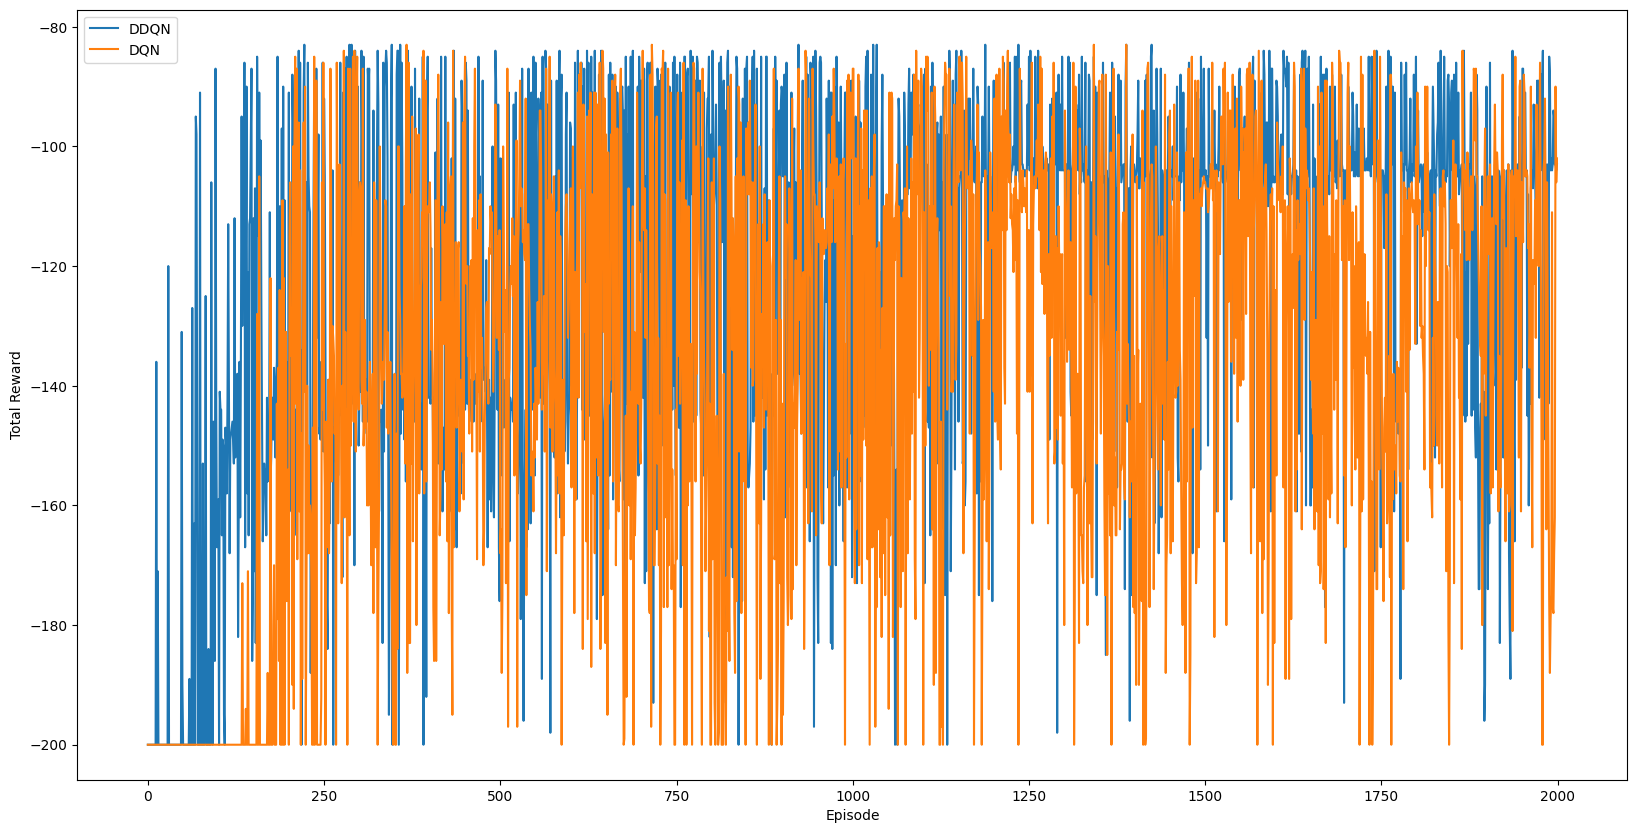

In [40]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(best_ddqn_rewards, label='DDQN')
ax.plot(best_dqn_rewards, label='DQN')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

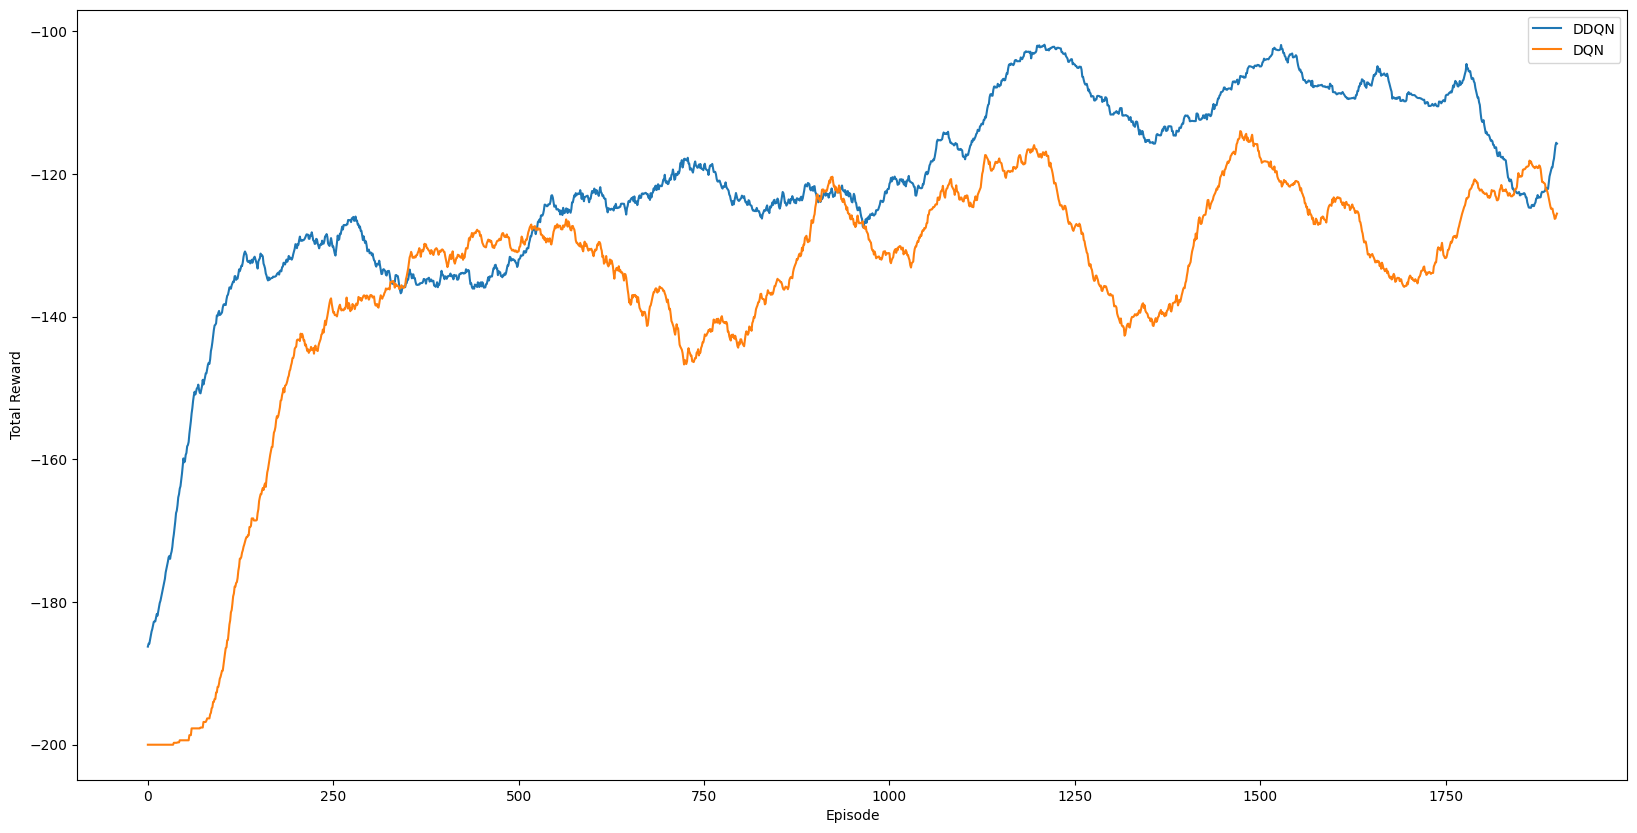

In [39]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(moving_average(best_ddqn_rewards), label='DDQN')
ax.plot(moving_average(best_dqn_rewards), label='DQN')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

In [55]:
ddqn_priority_checkpoint_path = os.path.join(
    checkpoint_folder, 'DoubleDQN_Priority_Agent.pth')

max_rewards = -np.inf
for i, param in enumerate(ddqn_params):
    print(f'{i+1}/{len(ddqn_params)}\n', param)
    ddqn_priority_agent = DoubleDQNAgent(state_size, action_size,
                                         **param, use_prioritized_replay=True)

    ddqn_priority_rewards = train_dqn(
        env, ddqn_priority_agent, **train_settings, logger=None)

    if (x := moving_average(ddqn_priority_rewards, 100).mean()) > max_rewards:
        max_rewards = x
        best_ddqn_priority_config = param
        best_ddqn_priority_agent = ddqn_priority_agent
        best_ddqn_priority_rewards = ddqn_priority_rewards
        ddqn_priority_agent.save_state(ddqn_priority_checkpoint_path)

1/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:31<11:30,  2.75it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:06<11:20,  2.64it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:40<09:00,  3.15it/s]

Episode 300/2000	Average Score: -198.75


Training:  20%|██        | 400/2000 [02:11<06:45,  3.95it/s]

Episode 400/2000	Average Score: -175.9


Training:  25%|██▌       | 500/2000 [02:46<07:38,  3.27it/s]

Episode 500/2000	Average Score: -194.12


Training:  30%|███       | 600/2000 [03:19<07:43,  3.02it/s]

Episode 600/2000	Average Score: -197.82


Training:  35%|███▌      | 700/2000 [03:52<07:35,  2.85it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:25<06:33,  3.05it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [04:59<06:27,  2.84it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [05:32<05:30,  3.03it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:07<04:57,  3.03it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:40<04:17,  3.11it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [07:07<02:50,  4.12it/s]

Episode 1300/2000	Average Score: -168.65


Training:  70%|███████   | 1400/2000 [07:34<02:14,  4.47it/s]

Episode 1400/2000	Average Score: -166.61


Training:  75%|███████▌  | 1500/2000 [08:05<02:31,  3.31it/s]

Episode 1500/2000	Average Score: -192.15


Training:  80%|████████  | 1600/2000 [08:36<02:08,  3.10it/s]

Episode 1600/2000	Average Score: -195.22


Training:  85%|████████▌ | 1700/2000 [09:08<01:38,  3.06it/s]

Episode 1700/2000	Average Score: -197.22


Training:  90%|█████████ | 1800/2000 [09:40<01:07,  2.96it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [10:12<00:31,  3.14it/s]

Episode 1900/2000	Average Score: -194.59


Training: 100%|██████████| 2000/2000 [10:43<00:00,  3.11it/s]


Episode 2000/2000	Average Score: -181.92
2/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:27<10:20,  3.06it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:00<10:31,  2.85it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:34<09:21,  3.03it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:07<08:41,  3.07it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:40<08:05,  3.09it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:14<07:38,  3.05it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [03:47<07:04,  3.06it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:20<06:37,  3.02it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [04:53<06:26,  2.85it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [05:28<05:29,  3.03it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:03<05:01,  2.99it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:36<04:25,  3.02it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [07:09<03:54,  2.98it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [07:42<03:30,  2.85it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [08:15<02:46,  3.01it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [08:48<02:26,  2.74it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [09:21<01:41,  2.96it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [09:54<01:06,  3.01it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [10:28<00:32,  3.03it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [11:01<00:00,  3.02it/s]


Episode 2000/2000	Average Score: -200.0
3/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:27<10:22,  3.05it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:00<10:12,  2.94it/s]

Episode 200/2000	Average Score: -199.08


Training:  15%|█▌        | 300/2000 [01:30<06:34,  4.31it/s]

Episode 300/2000	Average Score: -177.69


Training:  20%|██        | 400/2000 [01:59<07:15,  3.67it/s]

Episode 400/2000	Average Score: -179.12


Training:  25%|██▌       | 500/2000 [02:22<06:34,  3.80it/s]

Episode 500/2000	Average Score: -134.13


Training:  30%|███       | 601/2000 [02:43<04:16,  5.45it/s]

Episode 600/2000	Average Score: -127.92


Training:  35%|███▌      | 701/2000 [03:03<03:52,  5.60it/s]

Episode 700/2000	Average Score: -121.49


Training:  40%|████      | 801/2000 [03:22<03:34,  5.58it/s]

Episode 800/2000	Average Score: -115.66


Training:  45%|████▌     | 901/2000 [03:42<03:18,  5.53it/s]

Episode 900/2000	Average Score: -119.52


Training:  50%|█████     | 1000/2000 [04:01<03:02,  5.49it/s]

Episode 1000/2000	Average Score: -114.78


Training:  55%|█████▌    | 1100/2000 [04:34<04:51,  3.09it/s]

Episode 1100/2000	Average Score: -199.05


Training:  60%|██████    | 1200/2000 [05:06<04:20,  3.07it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [05:39<03:57,  2.94it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [06:13<03:16,  3.05it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [06:46<02:55,  2.86it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [07:20<02:13,  2.99it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [07:53<01:37,  3.07it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [08:26<01:05,  3.08it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [23:45<5:10:39, 186.40s/it]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [24:17<00:00,  1.37it/s]   


Episode 2000/2000	Average Score: -200.0
4/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [15:54<09:51,  3.21it/s]    

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [16:25<09:17,  3.23it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [16:57<09:01,  3.14it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [17:29<08:28,  3.15it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [18:00<07:58,  3.13it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [18:32<07:28,  3.12it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [19:05<07:00,  3.09it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [19:37<06:41,  2.99it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [20:11<06:23,  2.87it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [22:03<27:08,  1.63s/it]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [22:52<05:07,  2.92it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [23:26<04:26,  3.00it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [24:58<18:51,  1.62s/it]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [26:44<03:48,  2.63it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [27:23<03:18,  2.52it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [29:12<10:43,  1.61s/it]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [30:51<02:41,  1.86it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [31:49<02:00,  1.66it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [32:57<01:13,  1.36it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [34:23<00:00,  1.03s/it]


Episode 2000/2000	Average Score: -200.0
5/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [01:06<24:17,  1.30it/s]

Episode 100/2000	Average Score: -197.38


Training:  10%|█         | 200/2000 [02:22<25:25,  1.18it/s]

Episode 200/2000	Average Score: -185.03


Training:  15%|█▌        | 300/2000 [03:33<18:47,  1.51it/s]

Episode 300/2000	Average Score: -171.35


Training:  20%|██        | 400/2000 [04:58<24:05,  1.11it/s]

Episode 400/2000	Average Score: -195.33


Training:  25%|██▌       | 500/2000 [06:23<22:27,  1.11it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [07:38<11:20,  2.06it/s]

Episode 600/2000	Average Score: -176.93


Training:  35%|███▌      | 700/2000 [08:37<12:46,  1.70it/s]

Episode 700/2000	Average Score: -139.56


Training:  40%|████      | 800/2000 [09:10<06:14,  3.21it/s]

Episode 800/2000	Average Score: -141.89


Training:  45%|████▌     | 900/2000 [09:41<05:49,  3.15it/s]

Episode 900/2000	Average Score: -194.67


Training:  50%|█████     | 1000/2000 [10:12<05:14,  3.18it/s]

Episode 1000/2000	Average Score: -198.0


Training:  55%|█████▌    | 1100/2000 [10:45<04:44,  3.16it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [11:59<04:17,  3.11it/s]  

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [16:09<04:36,  2.53it/s]   

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [16:40<03:07,  3.20it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [19:22<02:39,  3.14it/s]  

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [35:26<02:34,  2.58it/s]    

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [35:58<01:34,  3.18it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [36:30<01:02,  3.20it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [36:59<00:29,  3.39it/s]

Episode 1900/2000	Average Score: -188.51


Training: 100%|██████████| 2000/2000 [37:29<00:00,  1.12s/it]


Episode 2000/2000	Average Score: -188.35
6/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:26<09:48,  3.23it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [00:57<09:12,  3.26it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:29<09:13,  3.07it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [07:37<15:26:29, 34.74s/it] 

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [08:18<09:25,  2.65it/s]   

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [08:49<07:11,  3.24it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [09:21<06:42,  3.23it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [09:52<06:21,  3.14it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [12:59<4:57:00, 16.20s/it] 

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [13:30<05:15,  3.17it/s] 

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [14:02<04:44,  3.16it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [14:34<04:12,  3.17it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [15:05<03:41,  3.16it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [15:36<03:03,  3.27it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [16:07<02:35,  3.22it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [16:38<02:05,  3.19it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [17:56<02:30,  1.99it/s]  

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [18:27<01:02,  3.18it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [24:59<00:31,  3.13it/s]   

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [30:21<00:00,  1.10it/s]


Episode 2000/2000	Average Score: -200.0
7/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:26<09:47,  3.23it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [07:47<09:19,  3.22it/s]    

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [10:56<15:43:22, 33.30s/it]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [11:28<08:20,  3.20it/s]   

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [16:26<07:45,  3.22it/s]   

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [17:13<1:30:24,  3.87s/it]

Episode 600/2000	Average Score: -194.73


Training:  35%|███▌      | 700/2000 [17:44<06:49,  3.18it/s]  

Episode 700/2000	Average Score: -195.82


Training:  40%|████      | 800/2000 [34:08<06:23,  3.13it/s]    

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [34:40<05:55,  3.09it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [35:12<05:14,  3.18it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [35:44<04:47,  3.13it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [36:15<04:14,  3.14it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [36:47<03:51,  3.02it/s]

Episode 1300/2000	Average Score: -197.84


Training:  70%|███████   | 1400/2000 [37:19<03:10,  3.15it/s]

Episode 1400/2000	Average Score: -198.42


Training:  75%|███████▌  | 1500/2000 [37:51<02:40,  3.11it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [38:23<02:08,  3.11it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [48:58<01:35,  3.13it/s]    

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [49:30<01:02,  3.18it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [50:02<00:31,  3.18it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [50:33<00:00,  1.52s/it]


Episode 2000/2000	Average Score: -200.0
8/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.95, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:26<09:48,  3.23it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [00:57<09:36,  3.12it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:29<08:59,  3.15it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:02<08:49,  3.02it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [03:59<08:01,  3.11it/s]   

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [04:32<07:30,  3.11it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [05:03<06:51,  3.16it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [05:36<06:36,  3.02it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [06:17<26:47,  1.46s/it]

Episode 900/2000	Average Score: -198.17


Training:  50%|█████     | 1000/2000 [06:48<05:17,  3.15it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [07:19<04:37,  3.25it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [07:51<04:06,  3.25it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [08:23<03:41,  3.16it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [08:54<03:10,  3.14it/s]

Episode 1400/2000	Average Score: -199.93


Training:  75%|███████▌  | 1500/2000 [09:26<02:37,  3.17it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [09:58<02:08,  3.12it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [10:29<01:33,  3.22it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [11:00<01:02,  3.20it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [11:31<00:31,  3.21it/s]

Episode 1900/2000	Average Score: -199.56


Training: 100%|██████████| 2000/2000 [21:33<00:00,  1.55it/s] 


Episode 2000/2000	Average Score: -200.0
9/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:26<09:49,  3.22it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [04:09<09:15,  3.24it/s]   

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [04:40<08:20,  3.40it/s]

Episode 300/2000	Average Score: -196.02


Training:  20%|██        | 400/2000 [18:19<08:13,  3.24it/s]     

Episode 400/2000	Average Score: -184.82


Training:  25%|██▌       | 500/2000 [35:13<07:28,  3.34it/s]     

Episode 500/2000	Average Score: -191.47


Training:  30%|███       | 600/2000 [35:42<06:29,  3.59it/s]

Episode 600/2000	Average Score: -178.34


Training:  35%|███▌      | 700/2000 [36:12<06:41,  3.24it/s]

Episode 700/2000	Average Score: -197.54


Training:  40%|████      | 800/2000 [36:44<06:19,  3.16it/s]

Episode 800/2000	Average Score: -199.81


Training:  45%|████▌     | 900/2000 [37:15<05:40,  3.23it/s]

Episode 900/2000	Average Score: -195.02


Training:  50%|█████     | 1001/2000 [37:39<03:01,  5.51it/s]

Episode 1000/2000	Average Score: -149.06


Training:  55%|█████▌    | 1100/2000 [38:02<03:23,  4.43it/s]

Episode 1100/2000	Average Score: -145.61


Training:  60%|██████    | 1200/2000 [38:23<03:08,  4.24it/s]

Episode 1200/2000	Average Score: -136.51


Training:  65%|██████▌   | 1301/2000 [38:44<02:13,  5.23it/s]

Episode 1300/2000	Average Score: -128.41


Training:  70%|███████   | 1400/2000 [39:05<02:26,  4.09it/s]

Episode 1400/2000	Average Score: -135.89


Training:  75%|███████▌  | 1500/2000 [39:36<02:36,  3.20it/s]

Episode 1500/2000	Average Score: -197.97


Training:  80%|████████  | 1600/2000 [40:07<02:04,  3.22it/s]

Episode 1600/2000	Average Score: -199.87


Training:  85%|████████▌ | 1700/2000 [50:58<01:46,  2.83it/s]    

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [51:31<01:05,  3.05it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [52:04<00:32,  3.03it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [52:38<00:00,  1.58s/it]


Episode 2000/2000	Average Score: -200.0
10/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:28<10:30,  3.01it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:01<09:59,  3.00it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:35<09:29,  2.99it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:09<09:12,  2.90it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:42<08:21,  2.99it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:15<07:43,  3.02it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [03:49<07:12,  3.00it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:23<06:47,  2.95it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [04:56<06:05,  3.01it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [05:30<05:36,  2.97it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:03<04:59,  3.01it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:37<04:27,  2.99it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [07:11<04:06,  2.84it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [07:45<03:20,  2.99it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [08:18<02:46,  3.01it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [08:51<02:09,  3.09it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [09:25<01:38,  3.06it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [09:58<01:05,  3.03it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [10:32<00:33,  2.99it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [11:05<00:00,  3.01it/s]


Episode 2000/2000	Average Score: -200.0
11/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}


Training:   5%|▌         | 100/2000 [00:27<10:40,  2.96it/s]

Episode 100/2000	Average Score: -200.0


Training:  10%|█         | 200/2000 [01:00<09:46,  3.07it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:33<09:14,  3.07it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:07<09:11,  2.90it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:41<08:15,  3.03it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:14<07:39,  3.05it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [03:47<07:14,  2.99it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:20<06:42,  2.98it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [04:54<06:01,  3.05it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [05:28<05:33,  3.00it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:01<05:02,  2.97it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:34<04:25,  3.01it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [07:07<03:50,  3.03it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [07:40<03:16,  3.05it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [08:14<02:53,  2.88it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [08:47<02:12,  3.02it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [09:20<01:39,  3.03it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [09:53<01:06,  3.00it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [10:26<00:32,  3.04it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [10:59<00:00,  3.03it/s]


Episode 2000/2000	Average Score: -195.09
12/48
 {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.0001}


Training:   5%|▌         | 100/2000 [00:28<10:27,  3.03it/s]

Episode 100/2000	Average Score: -199.66


Training:  10%|█         | 200/2000 [01:01<09:56,  3.02it/s]

Episode 200/2000	Average Score: -200.0


Training:  15%|█▌        | 300/2000 [01:36<10:09,  2.79it/s]

Episode 300/2000	Average Score: -200.0


Training:  20%|██        | 400/2000 [02:09<08:46,  3.04it/s]

Episode 400/2000	Average Score: -200.0


Training:  25%|██▌       | 500/2000 [02:43<08:20,  3.00it/s]

Episode 500/2000	Average Score: -200.0


Training:  30%|███       | 600/2000 [03:16<08:11,  2.85it/s]

Episode 600/2000	Average Score: -200.0


Training:  35%|███▌      | 700/2000 [03:50<07:09,  3.03it/s]

Episode 700/2000	Average Score: -200.0


Training:  40%|████      | 800/2000 [04:23<07:03,  2.83it/s]

Episode 800/2000	Average Score: -200.0


Training:  45%|████▌     | 900/2000 [04:57<06:03,  3.03it/s]

Episode 900/2000	Average Score: -200.0


Training:  50%|█████     | 1000/2000 [05:30<05:27,  3.05it/s]

Episode 1000/2000	Average Score: -200.0


Training:  55%|█████▌    | 1100/2000 [06:04<05:20,  2.81it/s]

Episode 1100/2000	Average Score: -200.0


Training:  60%|██████    | 1200/2000 [06:40<04:33,  2.93it/s]

Episode 1200/2000	Average Score: -200.0


Training:  65%|██████▌   | 1300/2000 [07:18<04:42,  2.48it/s]

Episode 1300/2000	Average Score: -200.0


Training:  70%|███████   | 1400/2000 [07:52<03:13,  3.10it/s]

Episode 1400/2000	Average Score: -200.0


Training:  75%|███████▌  | 1500/2000 [08:27<02:54,  2.87it/s]

Episode 1500/2000	Average Score: -200.0


Training:  80%|████████  | 1600/2000 [09:01<02:25,  2.75it/s]

Episode 1600/2000	Average Score: -200.0


Training:  85%|████████▌ | 1700/2000 [09:36<01:46,  2.81it/s]

Episode 1700/2000	Average Score: -200.0


Training:  90%|█████████ | 1800/2000 [10:10<01:04,  3.10it/s]

Episode 1800/2000	Average Score: -200.0


Training:  95%|█████████▌| 1900/2000 [10:42<00:36,  2.74it/s]

Episode 1900/2000	Average Score: -200.0


Training: 100%|██████████| 2000/2000 [11:16<00:00,  2.95it/s]

Episode 2000/2000	Average Score: -200.0


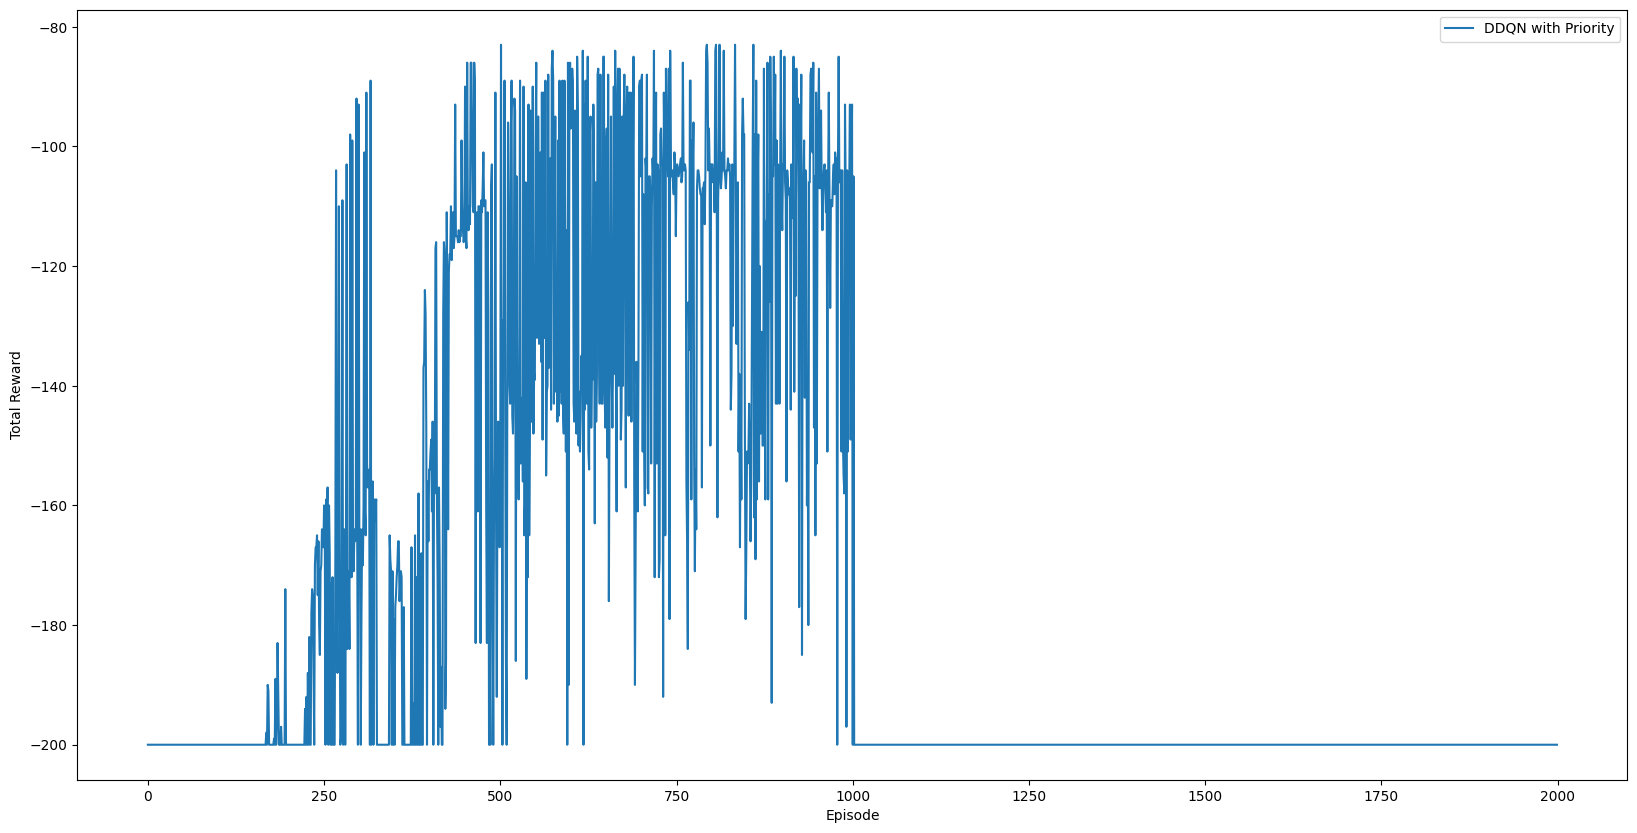

In [56]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(best_ddqn_priority_rewards, label='DDQN with Priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

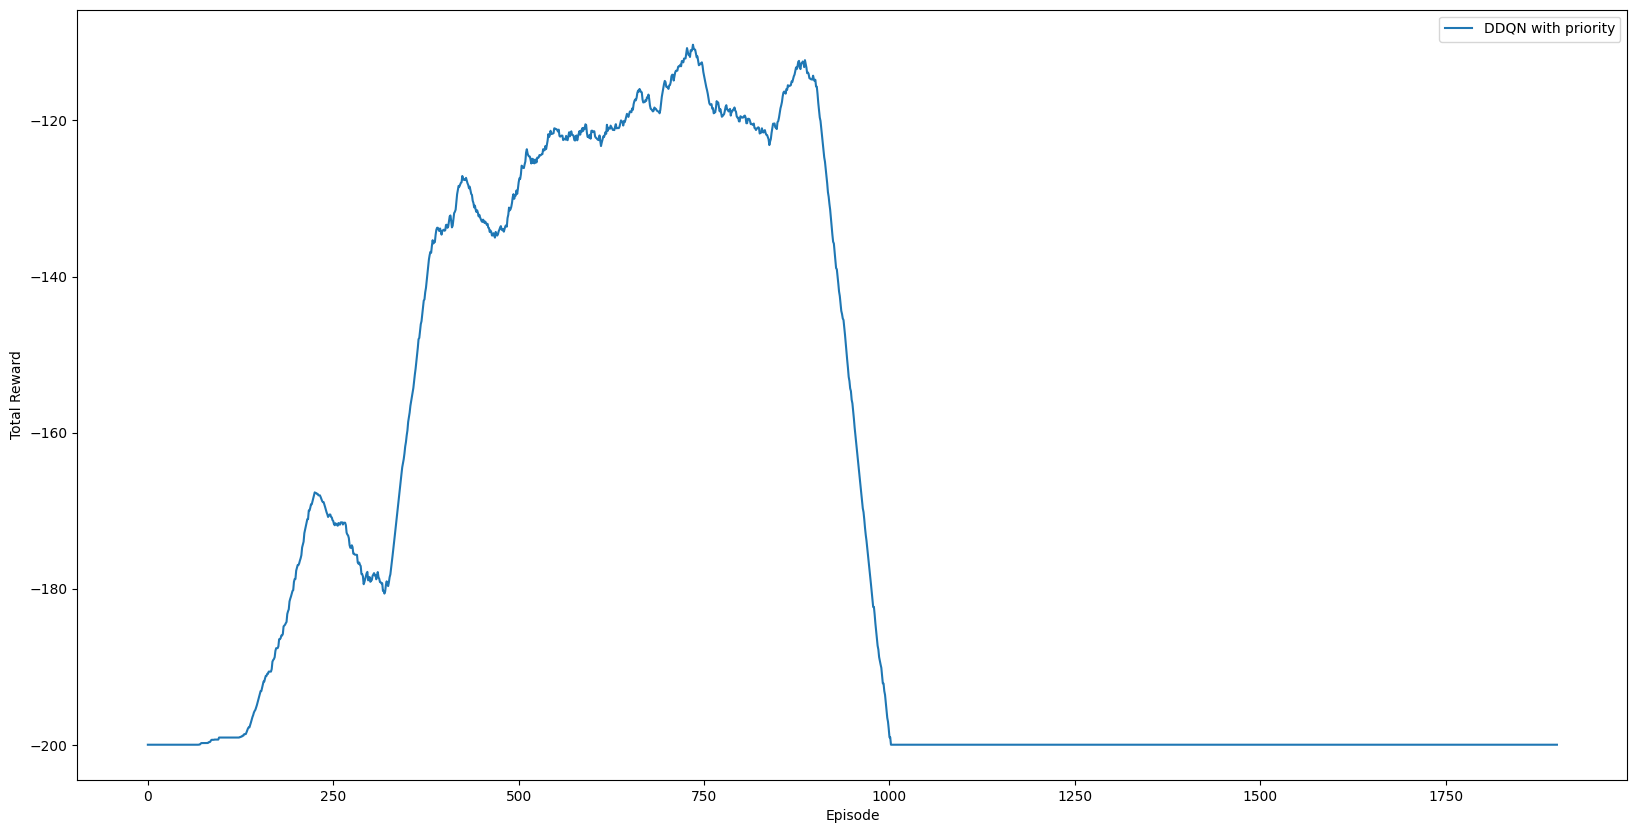

In [57]:
_, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(moving_average(best_ddqn_priority_rewards), label='DDQN with priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

In [58]:
print(f'{best_dqn_config = }', f'{best_ddqn_config = }',
      f'{best_dqn_priority_config = }', f'{best_ddqn_priority_config = }', sep="\n")

best_dqn_config = {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}
best_ddqn_config = {'alpha': 0.5, 'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001, 'update_frequency': 4}
best_dqn_priority_config = {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.95, 'epsilon_min': 0.01, 'gamma': 0.999, 'hidden_units': 64, 'lr': 0.001}
best_ddqn_priority_config = {'batch_size': 64, 'epsilon': 1.0, 'epsilon_decay': 0.99, 'epsilon_min': 0.01, 'gamma': 0.99, 'hidden_units': 64, 'lr': 0.001}


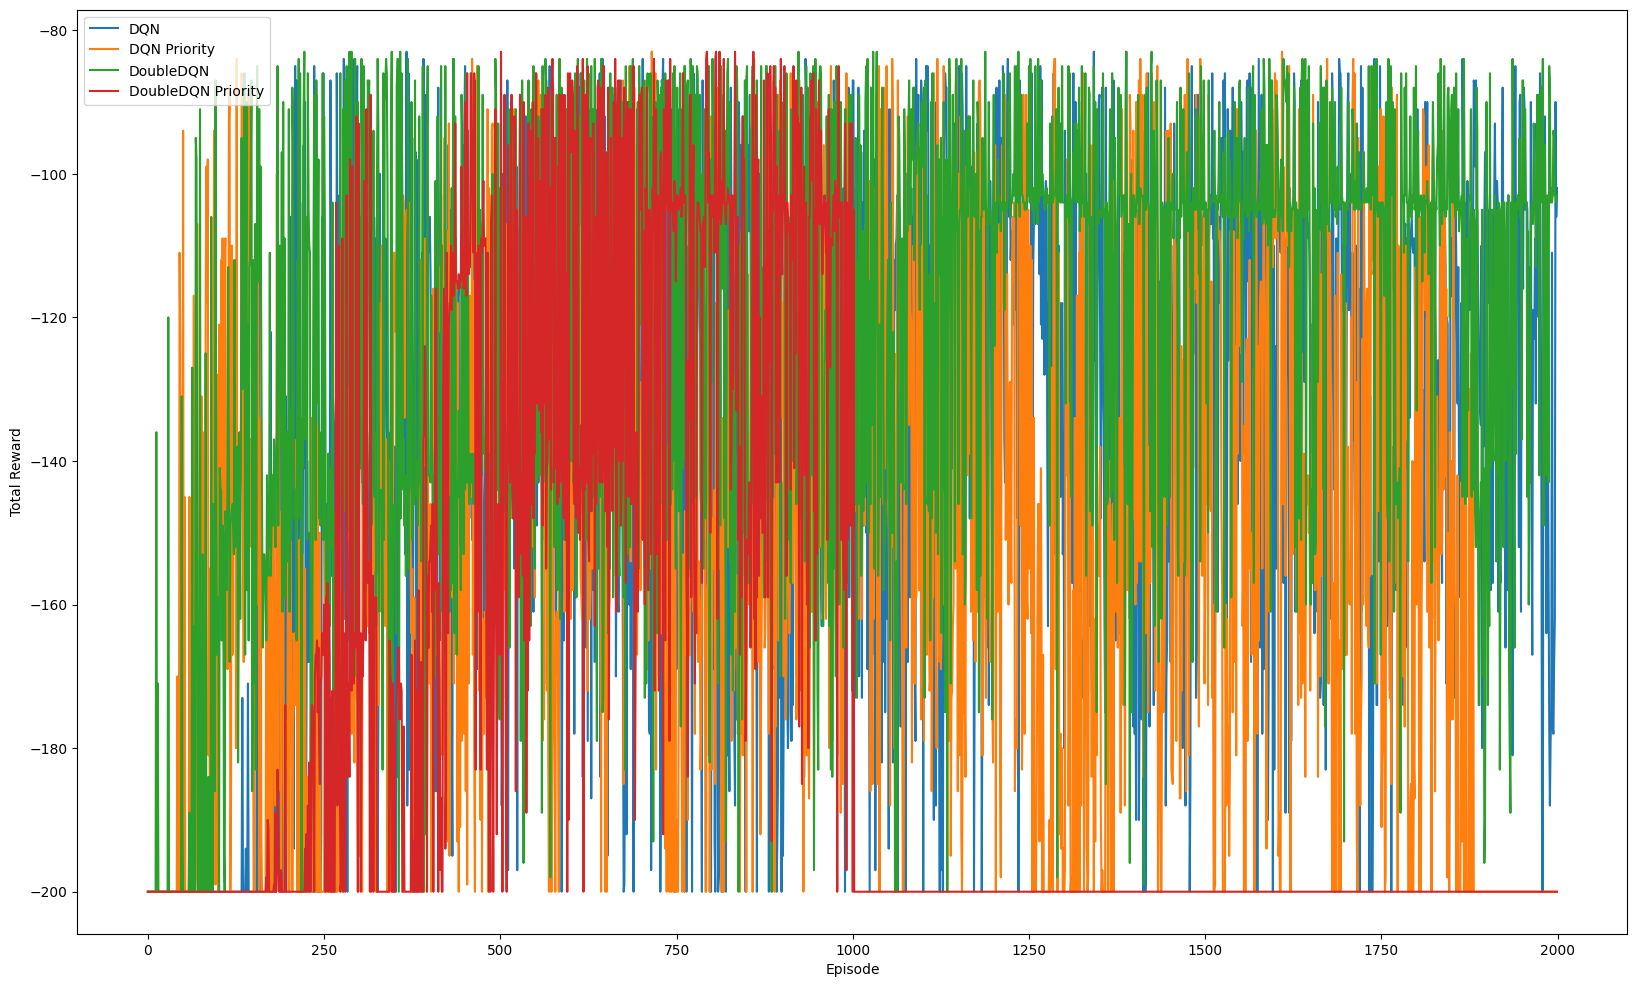

In [59]:
_, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.plot(best_dqn_rewards, label='DQN')
ax.plot(best_dqn_priority_rewards, label='DQN Priority')
ax.plot(best_ddqn_rewards, label='DoubleDQN')
ax.plot(best_ddqn_priority_rewards, label='DoubleDQN Priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

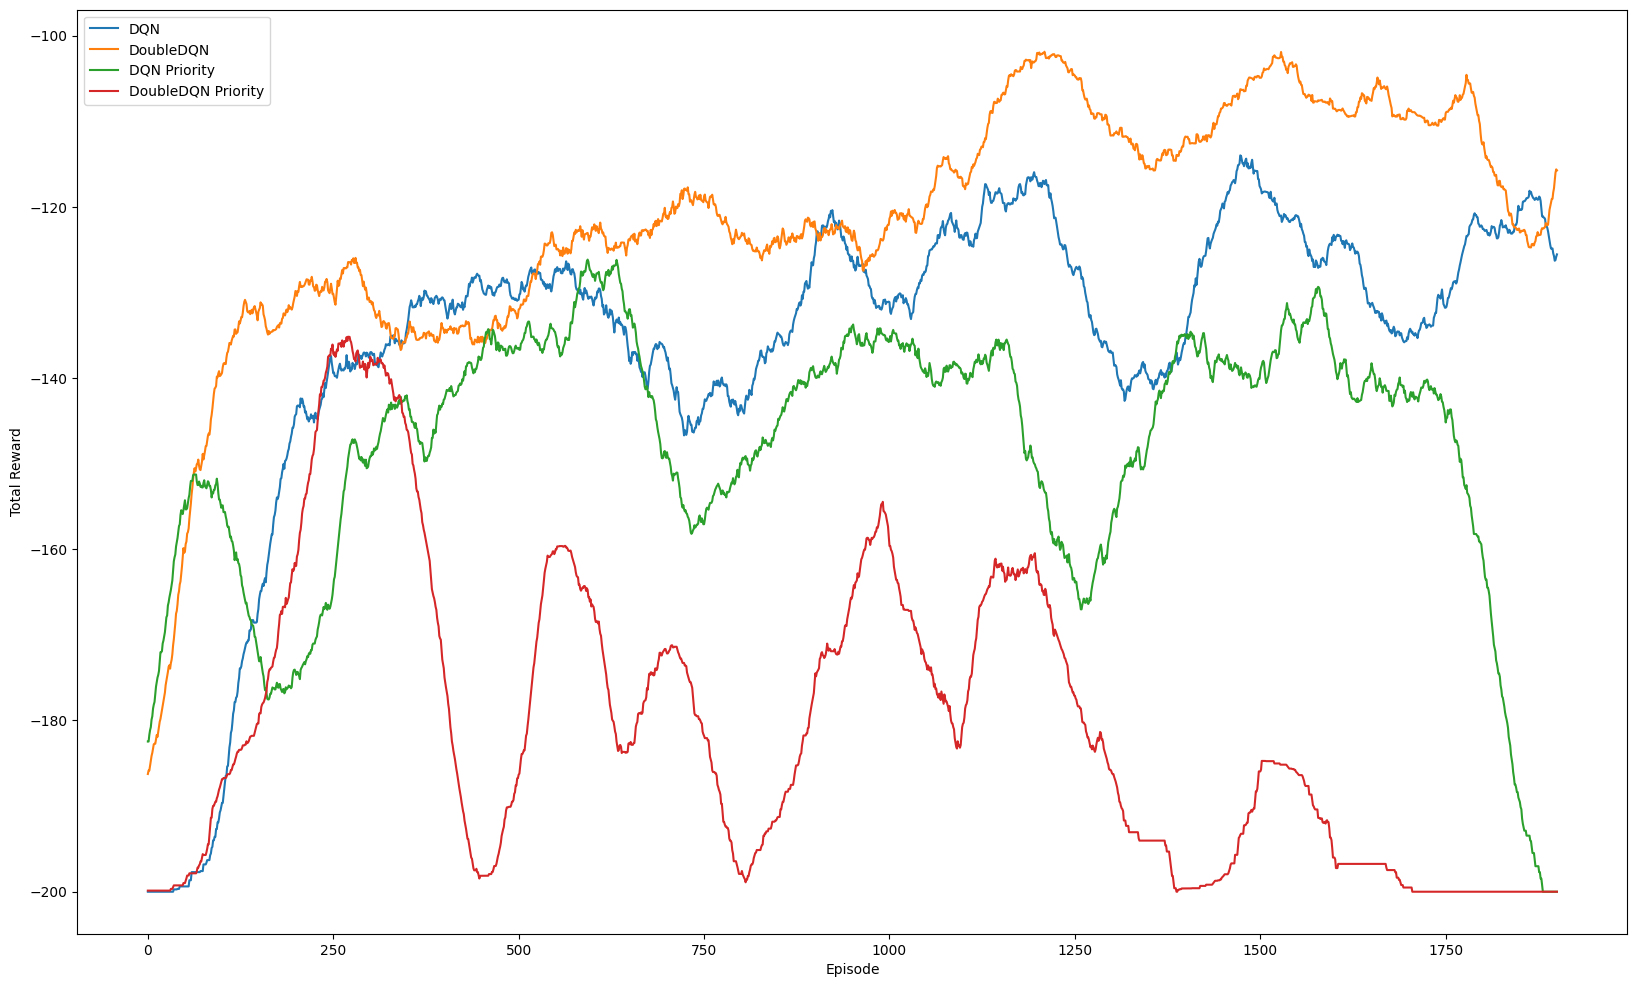

In [62]:
_, ax = plt.subplots(1, 1, figsize=(20, 12))
ax.plot(moving_average(best_dqn_rewards), label='DQN')
ax.plot(moving_average(best_ddqn_rewards), label='DoubleDQN')
ax.plot(moving_average(best_dqn_priority_rewards), label='DQN Priority')
ax.plot(moving_average(best_ddqn_priority_rewards), label='DoubleDQN Priority')
ax.legend()
ax.set_ylabel("Total Reward")
ax.set_xlabel("Episode")
plt.show()

In [42]:
from IPython import display


def simulate_notebook(agent: DQNAgent, env: gym.Env, ax: plt.Axes) -> None:
    state, _ = env.reset()
    img = ax.imshow(env.render())
    done = False
    total_reward = 0
    steps = 0
    while not done:
        action = agent.act(state)
        img.set_data(env.render())
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        done = terminated or truncated
    env.close()
    print(f'Total reward: {total_reward}\tSteps: {steps}')

Total reward: -169.0	Steps: 169


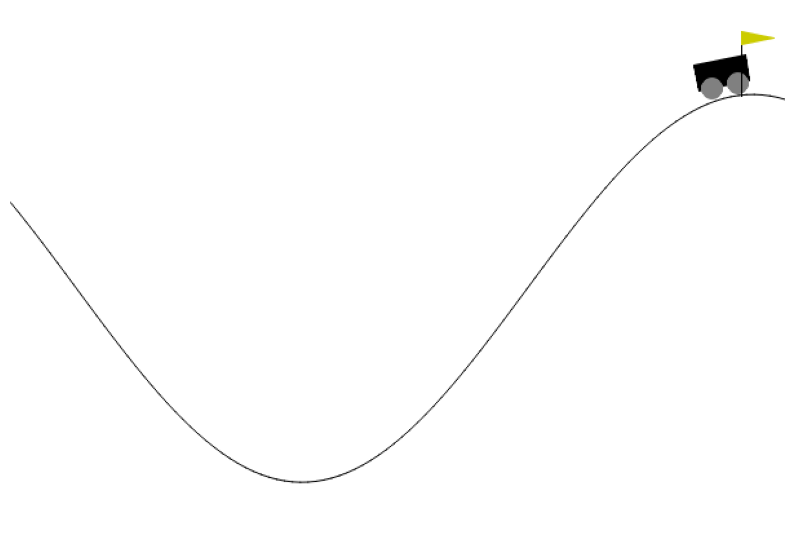

In [43]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(best_dqn_agent, env, ax)

Total reward: -200.0	Steps: 200


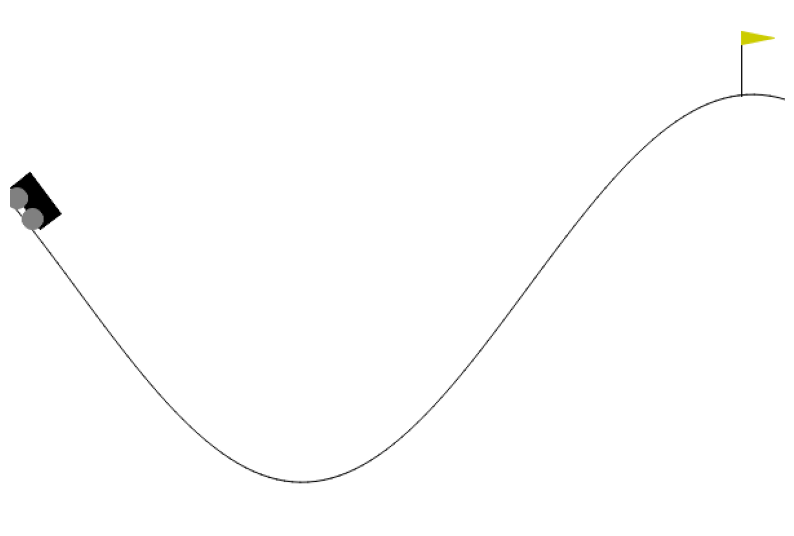

In [44]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(best_dqn_priority_agent, env, ax)

Total reward: -89.0	Steps: 89


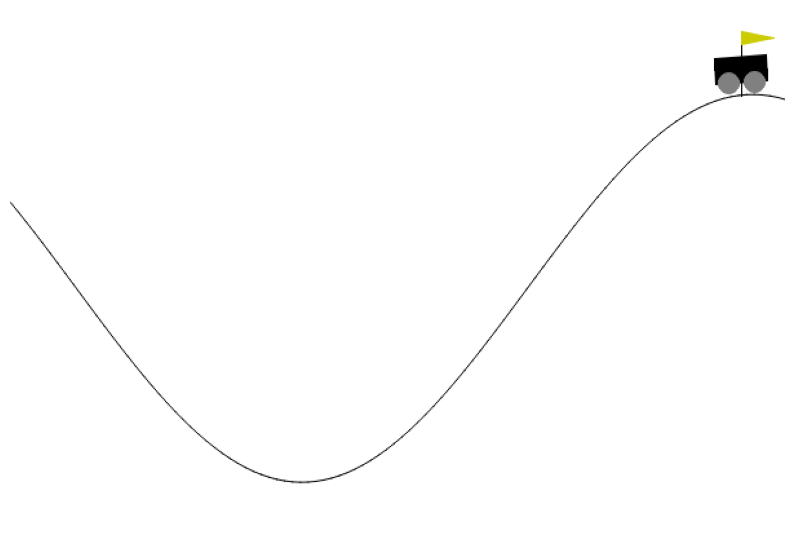

In [45]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(best_ddqn_agent, env, ax)

NameError: name 'simulate_notebook' is not defined

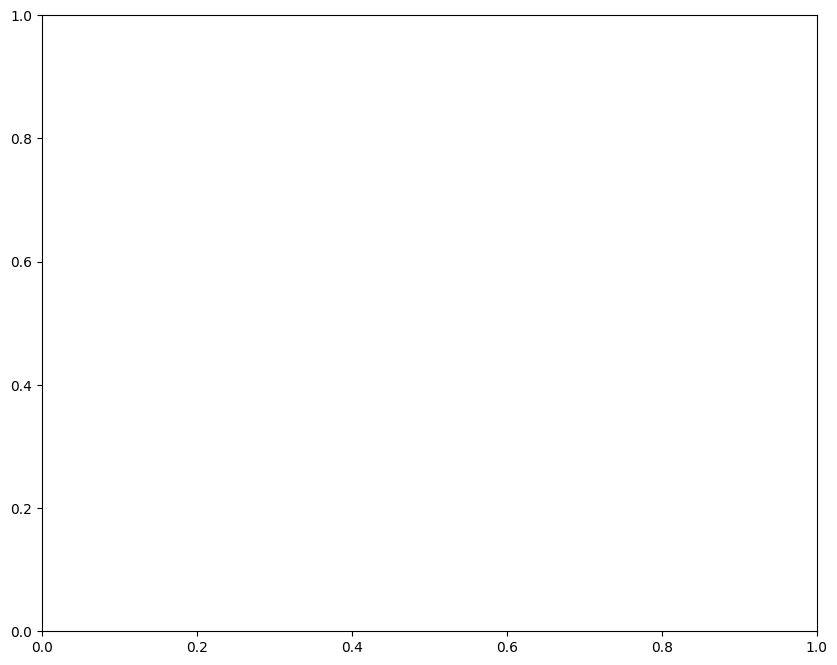

In [41]:
_, ax = plt.subplots(1, 1, figsize=(10, 8))
simulate_notebook(best_ddqn_priority_agent, env, ax)

In [25]:
import dill
dill.dump_session('notebook_env.db')